## Predicting Zestimate Logerror

## Executive Summary:
- clustering did not significantly improve the modeling process when incorporated as a feature
- clustering was helpful in identifying and narrowing variable connection to the target variable, LOGERROR
- I found SQ FT, YR BUILT and FIPS to be the main drivers of LOGERROR

## Project Goal:
- Use clusters to help your exploration, understanding, and modeling of the data.

- The target variable you are trying to predict is logerror (b/c this is a regression problem since logerror is continuous)

- BUT if you use a cluster number as a feature, that cluster should not have the target variable of logerror in it.

## 1. Wrangle

In [60]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import env
import os
import sklearn.preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import wrangle
from scipy import stats
# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#acquire the zillow data
full_df = wrangle.get_zillow_data()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   buildingclasstypeid           0 non-null      float64
 2   heatingorsystemtypeid         33936 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   storytypeid                   47 non-null     float64
 6   propertylandusetypeid         52442 non-null  float64
 7   parcelid                      52442 non-null  int64  
 8   id                            52442 non-null  int64  
 9   logerror                      52442 non-null  float64
 10  transactiondate               52442 non-null  object 
 11  id.1                          52442 non-null  int64  
 12  basementsqft                  47 non-null     float64
 13  b

### Notes:
 - initial SQL query returned 69 columns and 52442 rows

In [3]:
# run the data through our function to handle missing values
remove_nulls_df = wrangle.handle_missing_values(full_df)
remove_nulls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52440 non-null  float64
 1   parcelid                      52440 non-null  int64  
 2   id                            52440 non-null  int64  
 3   logerror                      52440 non-null  float64
 4   transactiondate               52440 non-null  object 
 5   id.1                          52440 non-null  int64  
 6   bathroomcnt                   52440 non-null  float64
 7   bedroomcnt                    52440 non-null  float64
 8   calculatedbathnbr             52305 non-null  float64
 9   calculatedfinishedsquarefeet  52360 non-null  float64
 10  finishedsquarefeet12          52195 non-null  float64
 11  fips                          52440 non-null  float64
 12  fullbathcnt                   52305 non-null  float64
 13  l

### Notes:
- removing >30% null columns and > 25% null rows returns a df with 30 cols and 52440 rows
- dropped 39 columns and 2 rows

In [4]:
remove_columns_df = wrangle.remove_columns(remove_nulls_df)
remove_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      52440 non-null  float64
 1   transactiondate               52440 non-null  object 
 2   bathroomcnt                   52440 non-null  float64
 3   bedroomcnt                    52440 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52440 non-null  float64
 6   latitude                      52440 non-null  float64
 7   longitude                     52440 non-null  float64
 8   lotsizesquarefeet             52073 non-null  float64
 9   roomcnt                       52440 non-null  float64
 10  yearbuilt                     52326 non-null  float64
 11  taxvaluedollarcnt             52439 non-null  float64
dtypes: float64(11), object(1)
memory usage: 5.2+ MB


In [5]:
remove_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      52440 non-null  float64
 1   transactiondate               52440 non-null  object 
 2   bathroomcnt                   52440 non-null  float64
 3   bedroomcnt                    52440 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52440 non-null  float64
 6   latitude                      52440 non-null  float64
 7   longitude                     52440 non-null  float64
 8   lotsizesquarefeet             52073 non-null  float64
 9   roomcnt                       52440 non-null  float64
 10  yearbuilt                     52326 non-null  float64
 11  taxvaluedollarcnt             52439 non-null  float64
dtypes: float64(11), object(1)
memory usage: 5.2+ MB


In [6]:
clean_d_types_df = wrangle.convert_data_types(remove_columns_df)
clean_d_types_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      52440 non-null  float64
 1   transactiondate               52440 non-null  object 
 2   bathroomcnt                   52440 non-null  float64
 3   bedroomcnt                    52440 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52440 non-null  object 
 6   latitude                      52440 non-null  object 
 7   longitude                     52440 non-null  object 
 8   lotsizesquarefeet             52073 non-null  float64
 9   roomcnt                       52440 non-null  float64
 10  yearbuilt                     52326 non-null  float64
 11  taxvaluedollarcnt             52439 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.2+ MB


In [7]:
clean_d_types_df.isna().sum()

logerror                          0
transactiondate                   0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet     80
fips                              0
latitude                          0
longitude                         0
lotsizesquarefeet               367
roomcnt                           0
yearbuilt                       114
taxvaluedollarcnt                 1
dtype: int64

### I still have nulls in my data, I need to get rid of them before proceeding. I'm going to remove regionidcity from the dataframe becasue it has more than 2% of the total data missing, and that's a risk to impute for a categorical variable. All others I'm comfortable imputing: 

In [8]:



no_nulls_df = wrangle.handle_remaining_nulls(clean_d_types_df)
no_nulls_df.isna().sum()

#success!

logerror                        0
transactiondate                 0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
dtype: int64

In [9]:
# now run the full wrangle functions to test them
df = wrangle.get_zillow_data()
df = wrangle.prep_zillow(df)

['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt']
       bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0         1.173897    0.736871                      1.172918   
1         1.270673    1.370886                      0.456237   
2         0.292845    0.317008                      0.677444   
3         0.684983    0.736871                      0.451506   
4         0.684983    0.736871                      1.035411   
...            ...         ...                           ...   
52437     0.292845    1.370886                      0.634597   
52438     0.292845    0.736871                      0.309763   
52439     1.270673    0.317008                      0.887689   
52440     0.292845    0.317008                      0.160299   
52441     0.292845    0.317008                      0.869754   

       lotsizesquarefeet   roomcnt  yearbuilt  taxvaluedollarcnt  
0               0.079053  0.601872  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50673 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      50673 non-null  float64
 1   transactiondate               50673 non-null  object 
 2   bathroomcnt                   50673 non-null  float64
 3   bedroomcnt                    50673 non-null  float64
 4   calculatedfinishedsquarefeet  50673 non-null  float64
 5   fips                          50673 non-null  object 
 6   latitude                      50673 non-null  object 
 7   longitude                     50673 non-null  object 
 8   lotsizesquarefeet             50673 non-null  float64
 9   roomcnt                       50673 non-null  float64
 10  yearbuilt                     50673 non-null  float64
 11  taxvaluedollarcnt             50673 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.0+ MB


In [11]:
df = wrangle.wrangle_zillow()

['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt']
       bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0         1.173897    0.736871                      1.172918   
1         1.270673    1.370886                      0.456237   
2         0.292845    0.317008                      0.677444   
3         0.684983    0.736871                      0.451506   
4         0.684983    0.736871                      1.035411   
...            ...         ...                           ...   
52437     0.292845    1.370886                      0.634597   
52438     0.292845    0.736871                      0.309763   
52439     1.270673    0.317008                      0.887689   
52440     0.292845    0.317008                      0.160299   
52441     0.292845    0.317008                      0.869754   

       lotsizesquarefeet   roomcnt  yearbuilt  taxvaluedollarcnt  
0               0.079053  0.601872  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50673 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      50673 non-null  float64
 1   transactiondate               50673 non-null  object 
 2   bathroomcnt                   50673 non-null  float64
 3   bedroomcnt                    50673 non-null  float64
 4   calculatedfinishedsquarefeet  50673 non-null  float64
 5   fips                          50673 non-null  object 
 6   latitude                      50673 non-null  object 
 7   longitude                     50673 non-null  object 
 8   lotsizesquarefeet             50673 non-null  float64
 9   roomcnt                       50673 non-null  float64
 10  yearbuilt                     50673 non-null  float64
 11  taxvaluedollarcnt             50673 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.0+ MB


### we can see that we ended up with 52,377 rows after cleaning the data.
### we started with 52,442 from the initial SQL query
### down to 50,449 rows and 21 columns. May chop more

## Understanding the target variable:
1. The target variable is logerror
2. 𝑙𝑜𝑔𝑒𝑟𝑟𝑜𝑟=𝑙𝑜𝑔(𝑍𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑒)−𝑙𝑜𝑔(𝑆𝑎𝑙𝑒𝑃𝑟𝑖𝑐𝑒)
    - its log(zillow's estimated home price) - log(actual sale price)
    - I have logerror
    - I have an approximation of the estimated home price in taxvaluedollarcnt
    - therefore: logerror + log(taxvaluedollarcount) = log(zillow estimated home price)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50673 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      50673 non-null  float64
 1   transactiondate               50673 non-null  object 
 2   bathroomcnt                   50673 non-null  float64
 3   bedroomcnt                    50673 non-null  float64
 4   calculatedfinishedsquarefeet  50673 non-null  float64
 5   fips                          50673 non-null  object 
 6   latitude                      50673 non-null  object 
 7   longitude                     50673 non-null  object 
 8   lotsizesquarefeet             50673 non-null  float64
 9   roomcnt                       50673 non-null  float64
 10  yearbuilt                     50673 non-null  float64
 11  taxvaluedollarcnt             50673 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.0+ MB


In [15]:
df.head()

logerror transactiondate  bathroomcnt  bedroomcnt  \
0  0.025595      2017-01-01          3.5         4.0   
1  0.055619      2017-01-01          1.0         2.0   
2  0.005383      2017-01-01          2.0         3.0   
3 -0.103410      2017-01-01          3.0         4.0   
4 -0.001011      2017-01-01          3.0         4.0   

   calculatedfinishedsquarefeet           fips    latitude    longitude  \
0                        3100.0  orange_county  33634931.0 -117869207.0   
1                        1465.0        ventura  34449266.0 -119281531.0   
2                        1243.0  orange_county  33886168.0 -117823170.0   
3                        2376.0    los_angeles  34245180.0 -118240722.0   
4                        2962.0    los_angeles  34145202.0 -118179824.0   

   lotsizesquarefeet  roomcnt  yearbuilt  taxvaluedollarcnt  
0             4506.0      0.0     1998.0          1023282.0  
1            12647.0      5.0     1967.0           464000.0  
2             8432.0      6.0     1962.0           564778.0  
3            13038.0      0.0     1970.0           145143.0  
4            63000.0      0.0     1950.0           773303.0

<AxesSubplot:>

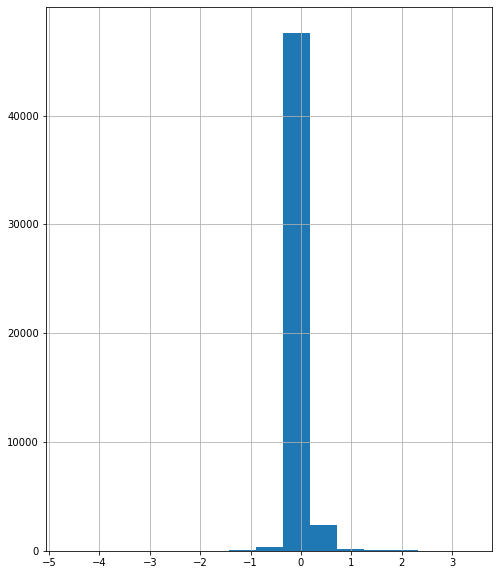

In [16]:
df.logerror.hist(figsize=(8, 10), bins=15)

array([[<AxesSubplot:title={'center':'logerror'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'bedroomcnt'}>],
       [<AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>,
        <AxesSubplot:title={'center':'lotsizesquarefeet'}>,
        <AxesSubplot:title={'center':'roomcnt'}>],
       [<AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'taxvaluedollarcnt'}>,
        <AxesSubplot:title={'center':'zillow_price_est'}>],
       [<AxesSubplot:title={'center':'zillow_error'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

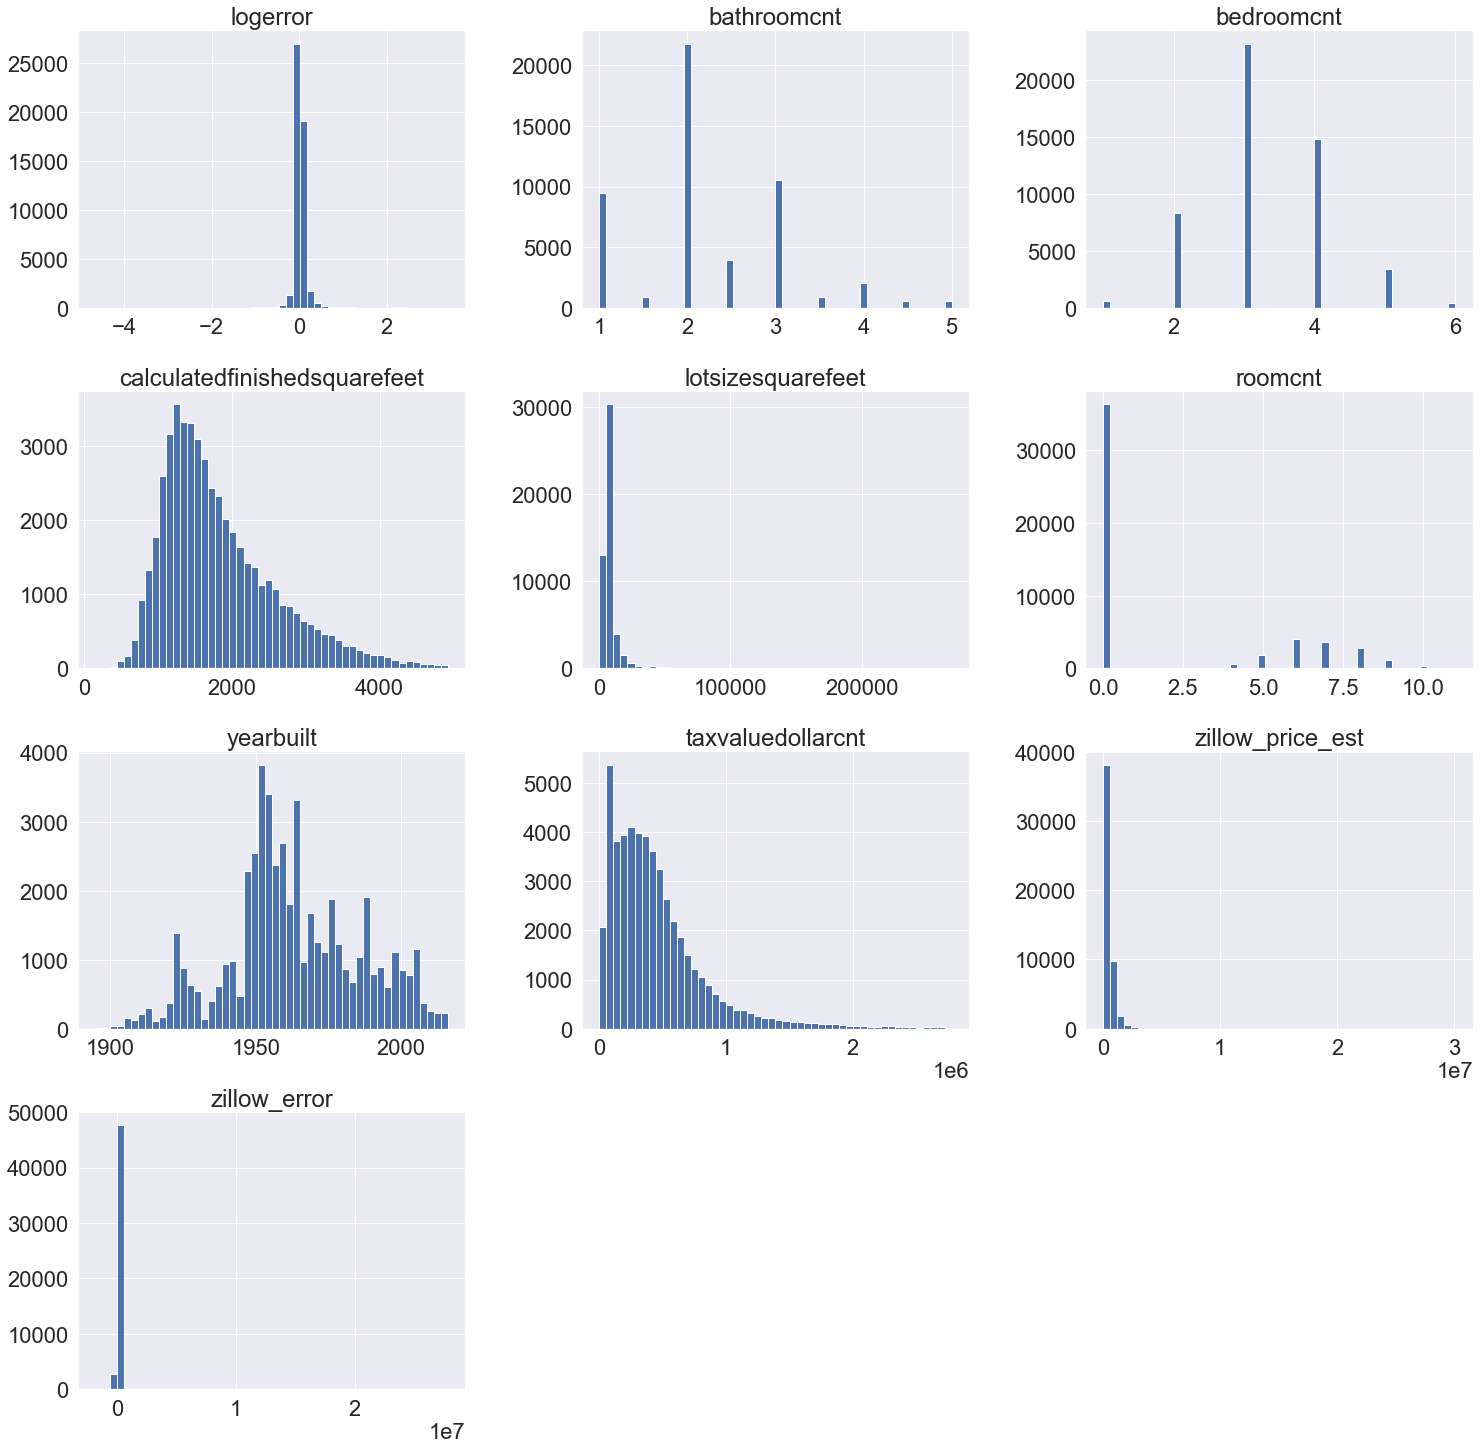

In [37]:
df.hist(figsize=(25, 25), bins=50)

### Takeaways from single variable distributions:
- logerror is normal, centered on 0
- baths is right skewed, centered on 2
- beds is right skewed, centered on 4
- finishedsqft is right skewed, centered 2500
- fips is divided unequally among 3 counties, with LA highest
- roomcnt has a normal dist around 6.5, where not null or 0 (lots of zeroes). Is the number of zeroes throwing off the zestimate? I'm going to drop this from my modeling df
- year built is is right skewed, centered on 1950-60
- get rid of columns with mainly one value:
    - assessemnt year
    - unitcnt
    - finishedsquareft12 is same as calculatedfinishedsqft
- make zips/ids into objects:
    - regionidzip
    - regionidcounty
    - regionidcity

### I'm creating 'logerror_bins' so that I can isolate high logerror rows from the DF and then investigate the drivers of logerror in those cases

In [18]:
bins = [-4.33, -2.33, -1.8, -1.0, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.8, 2.33, 4.33 ]
df['logerror_bins'] = pd.cut(df.logerror, bins)


## I'm creating 'zillow_price_est' so that I can directly compare it with taxvaluedollarcnt
- ln(error) + ln(taxvaluedollarcount) = ln(zillow estimated home price)
- inv.ln(logerr + log(taxvaluedollarcnt)) = zillow estimated home price


In [19]:
df['zillow_price_est'] = np.e**((df.logerror) + np.log(df.taxvaluedollarcnt))
df.zillow_price_est.mean()

473844.4421851064

## Create zillow error to get price estimate error in dollars

In [20]:
df['zillow_error'] = df.zillow_price_est - df.taxvaluedollarcnt
df.zillow_error.mean()

19650.526577832035

In [21]:
df.groupby('logerror_bins').agg(["min","max","mean", "count"]).logerror.T

logerror_bins  (-4.33, -2.33]  (-2.33, -1.8]  (-1.8, -1.0]  (-1.0, -0.75]  \
min                 -2.406257      -2.327432     -1.738639      -0.996519   
max                 -2.330162      -1.866832     -1.009838      -0.750781   
mean                -2.363986      -2.217180     -1.258332      -0.867657   
count                4.000000      19.000000     26.000000      53.000000   

logerror_bins  (-0.75, -0.5]  (-0.5, -0.25]  (-0.25, 0.0]   (0.0, 0.25]  \
min                -0.748125      -0.497263     -0.249966      0.000003   
max                -0.500204      -0.250277     -0.000002      0.249965   
mean               -0.602182      -0.335216     -0.044967      0.047357   
count             105.000000     550.000000  21326.000000  26939.000000   

logerror_bins  (0.25, 0.5]  (0.5, 0.75]  (0.75, 1.0]  (1.0, 1.8]  (1.8, 2.33]  \
min               0.250120     0.501805     0.751347    1.001120     1.804495   
max               0.497845     0.749906     0.998868    1.794840     2.326512   
mean              0.342936     0.602809     0.857289    1.287204     2.172758   
count          1081.000000   281.000000   103.000000   95.000000    61.000000   

logerror_bins  (2.33, 4.33]  
min                2.332701  
max                3.394544  
mean               2.578077  
count             28.000000

In [22]:
df.logerror.describe()

count    50673.000000
mean         0.017469
std          0.171793
min         -4.655420
25%         -0.024704
50%          0.006492
75%          0.039225
max          3.394544
Name: logerror, dtype: float64

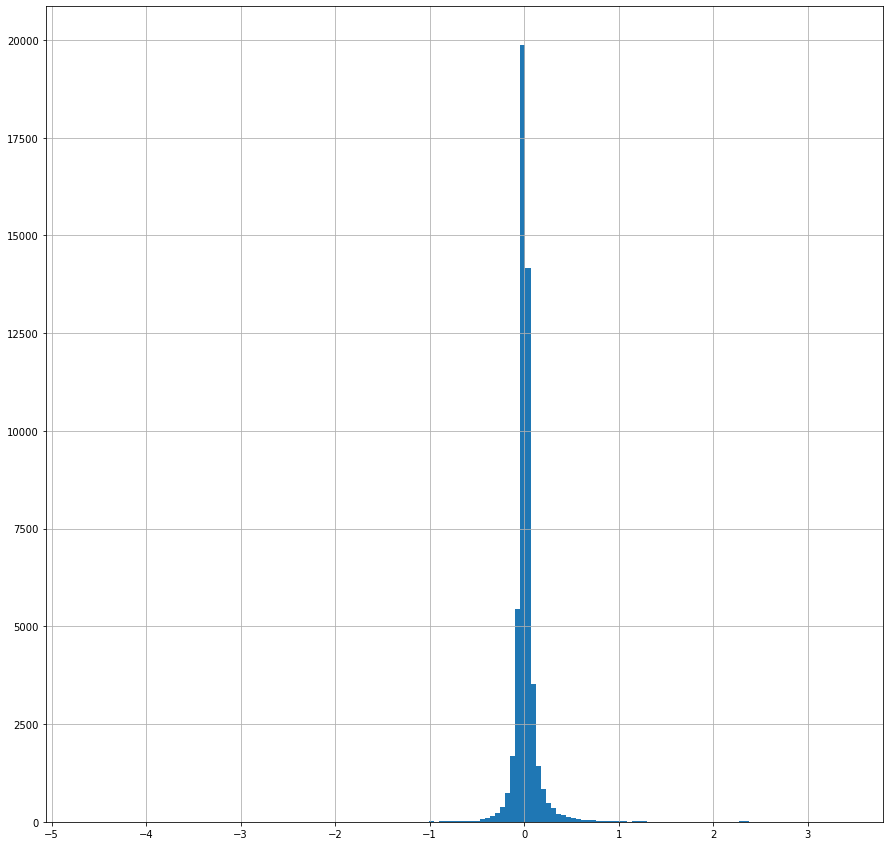

In [23]:
df.logerror.hist(bins=150, figsize=(15, 15))
plt.show()

## 2. Explore

In [24]:
df.dtypes

logerror                         float64
transactiondate                   object
bathroomcnt                      float64
bedroomcnt                       float64
calculatedfinishedsquarefeet     float64
fips                              object
latitude                          object
longitude                         object
lotsizesquarefeet                float64
roomcnt                          float64
yearbuilt                        float64
taxvaluedollarcnt                float64
logerror_bins                   category
zillow_price_est                 float64
zillow_error                     float64
dtype: object

In [25]:
import split

In [26]:
train, validate, test = split.train_validate_test_split(df,'logerror')
train.shape, validate.shape, test.shape

((28376, 15), (12162, 15), (10135, 15))

In [27]:
# top 5% of train dataset (~3 std from mean)
high_outliers = train.logerror.quantile(q=0.95)
# top 16% of train dataset (~2 std from mean)
upper_mid_outliers = train.logerror.quantile(q=0.84)
# bottom 16 of train dataset (~2 std from mean)
lower_mid_outliers = train.logerror.quantile(q=0.16)
# bottom 5% percent of dataset (~3 std from mean)
low_outliers = train.logerror.quantile(q=0.05)

In [51]:
high_outliers.min()

0.18480391105849997

In [52]:
high_outliers.max()

0.18480391105849997

In [28]:
#upper-high outliers are top 5% of the data
train_high_outliers = train[train.logerror > high_outliers]
# mid-outliers are between 95-86 percentiles
train_upper_mid_outliers = train[(train.logerror < high_outliers) & (train.logerror > upper_mid_outliers)]
# center-mass data will be 86-16 percentiles
train_center_mass = train[(train.logerror > lower_mid_outliers) & (train.logerror < upper_mid_outliers)]
# lower mid will be 16-5 percentiles
train_lower_mid_outliers = train[(train.logerror < lower_mid_outliers) & (train.logerror > low_outliers)]
# low outliers are bottom 5% of data
train_low_outliers = train[train.logerror < low_outliers]

In [29]:
train_high_outliers.head()

logerror transactiondate  bathroomcnt  bedroomcnt  \
6077   0.682494      2017-02-10          2.0         3.0   
42971  0.249837      2017-08-03          2.0         3.0   
4360   1.241767      2017-01-30          2.5         3.0   
24814  0.282481      2017-05-17          1.0         2.0   
51178  0.391733      2017-09-12          3.0         4.0   

       calculatedfinishedsquarefeet           fips    latitude    longitude  \
6077                         1664.0    los_angeles  34564547.0 -117951796.0   
42971                        1305.0        ventura  34347921.0 -119086382.0   
4360                         1737.0  orange_county  33634757.0 -117880460.0   
24814                         985.0    los_angeles  33922357.0 -118291926.0   
51178                        2445.0    los_angeles  34178295.0 -118659793.0   

       lotsizesquarefeet  roomcnt  yearbuilt  taxvaluedollarcnt logerror_bins  \
6077             45552.0      0.0     1989.0           113633.0   (0.5, 0.75]   
42971             5984.0      6.0     1973.0           260054.0   (0.0, 0.25]   
4360              1994.0      6.0     1966.0           947794.0    (1.0, 1.8]   
24814             6997.0      0.0     1954.0            41990.0   (0.25, 0.5]   
51178            11728.0      0.0     1967.0           457450.0   (0.25, 0.5]   

       zillow_price_est  zillow_error  
6077       2.248578e+05  1.112248e+05  
42971      3.338614e+05  7.380741e+04  
4360       3.281002e+06  2.333208e+06  
24814      5.569621e+04  1.370621e+04  
51178      6.768170e+05  2.193670e+05

In [30]:
numeric_cols = train.select_dtypes('float64').columns
non_numeric_cols = train.select_dtypes('object').columns

In [31]:
train_numeric = train[train.select_dtypes('float64').columns]
train_non_numeric = train[train.select_dtypes('object').columns]

### Now that I have built the outlier subsets, I want to visually show the variable relationships for:
- train dataset vs. high outliers vs. upper-mid vs. center mass vs. low-mid vs. low
- scatter plots for quant variables
- add hue for interesting categorical columns like fips
- Note: I'm going to need to build subplots for this

In [32]:
train.head(5)

logerror transactiondate  bathroomcnt  bedroomcnt  \
3323  -0.021395      2017-01-24          2.0         3.0   
2470  -0.023569      2017-01-18          1.0         2.0   
7019  -0.083987      2017-02-16          3.0         4.0   
50112 -0.039345      2017-09-06          3.0         3.0   
48192 -0.048605      2017-08-29          2.0         5.0   

       calculatedfinishedsquarefeet         fips    latitude    longitude  \
3323                         1115.0  los_angeles  34212796.0 -118543472.0   
2470                         1754.0  los_angeles  34105205.0 -118108463.0   
7019                         2497.0  los_angeles  34465169.0 -118494179.0   
50112                        1780.0  los_angeles  34567611.0 -118172344.0   
48192                        1875.0  los_angeles  33966020.0 -118023774.0   

       lotsizesquarefeet  roomcnt  yearbuilt  taxvaluedollarcnt logerror_bins  \
3323             13043.0      0.0     1956.0           254647.0  (-0.25, 0.0]   
2470              8666.0      0.0     1938.0           582447.0  (-0.25, 0.0]   
7019             18496.0      0.0     1989.0           462901.0  (-0.25, 0.0]   
50112             5069.0      0.0     2005.0           260000.0  (-0.25, 0.0]   
48192             5940.0      0.0     1951.0           522149.0  (-0.25, 0.0]   

       zillow_price_est  zillow_error  
3323      249256.585265  -5390.414735  
2470      568879.837510 -13567.162490  
7019      425611.362951 -37289.637049  
50112     249968.984278 -10031.015722  
48192     497376.640046 -24772.359954

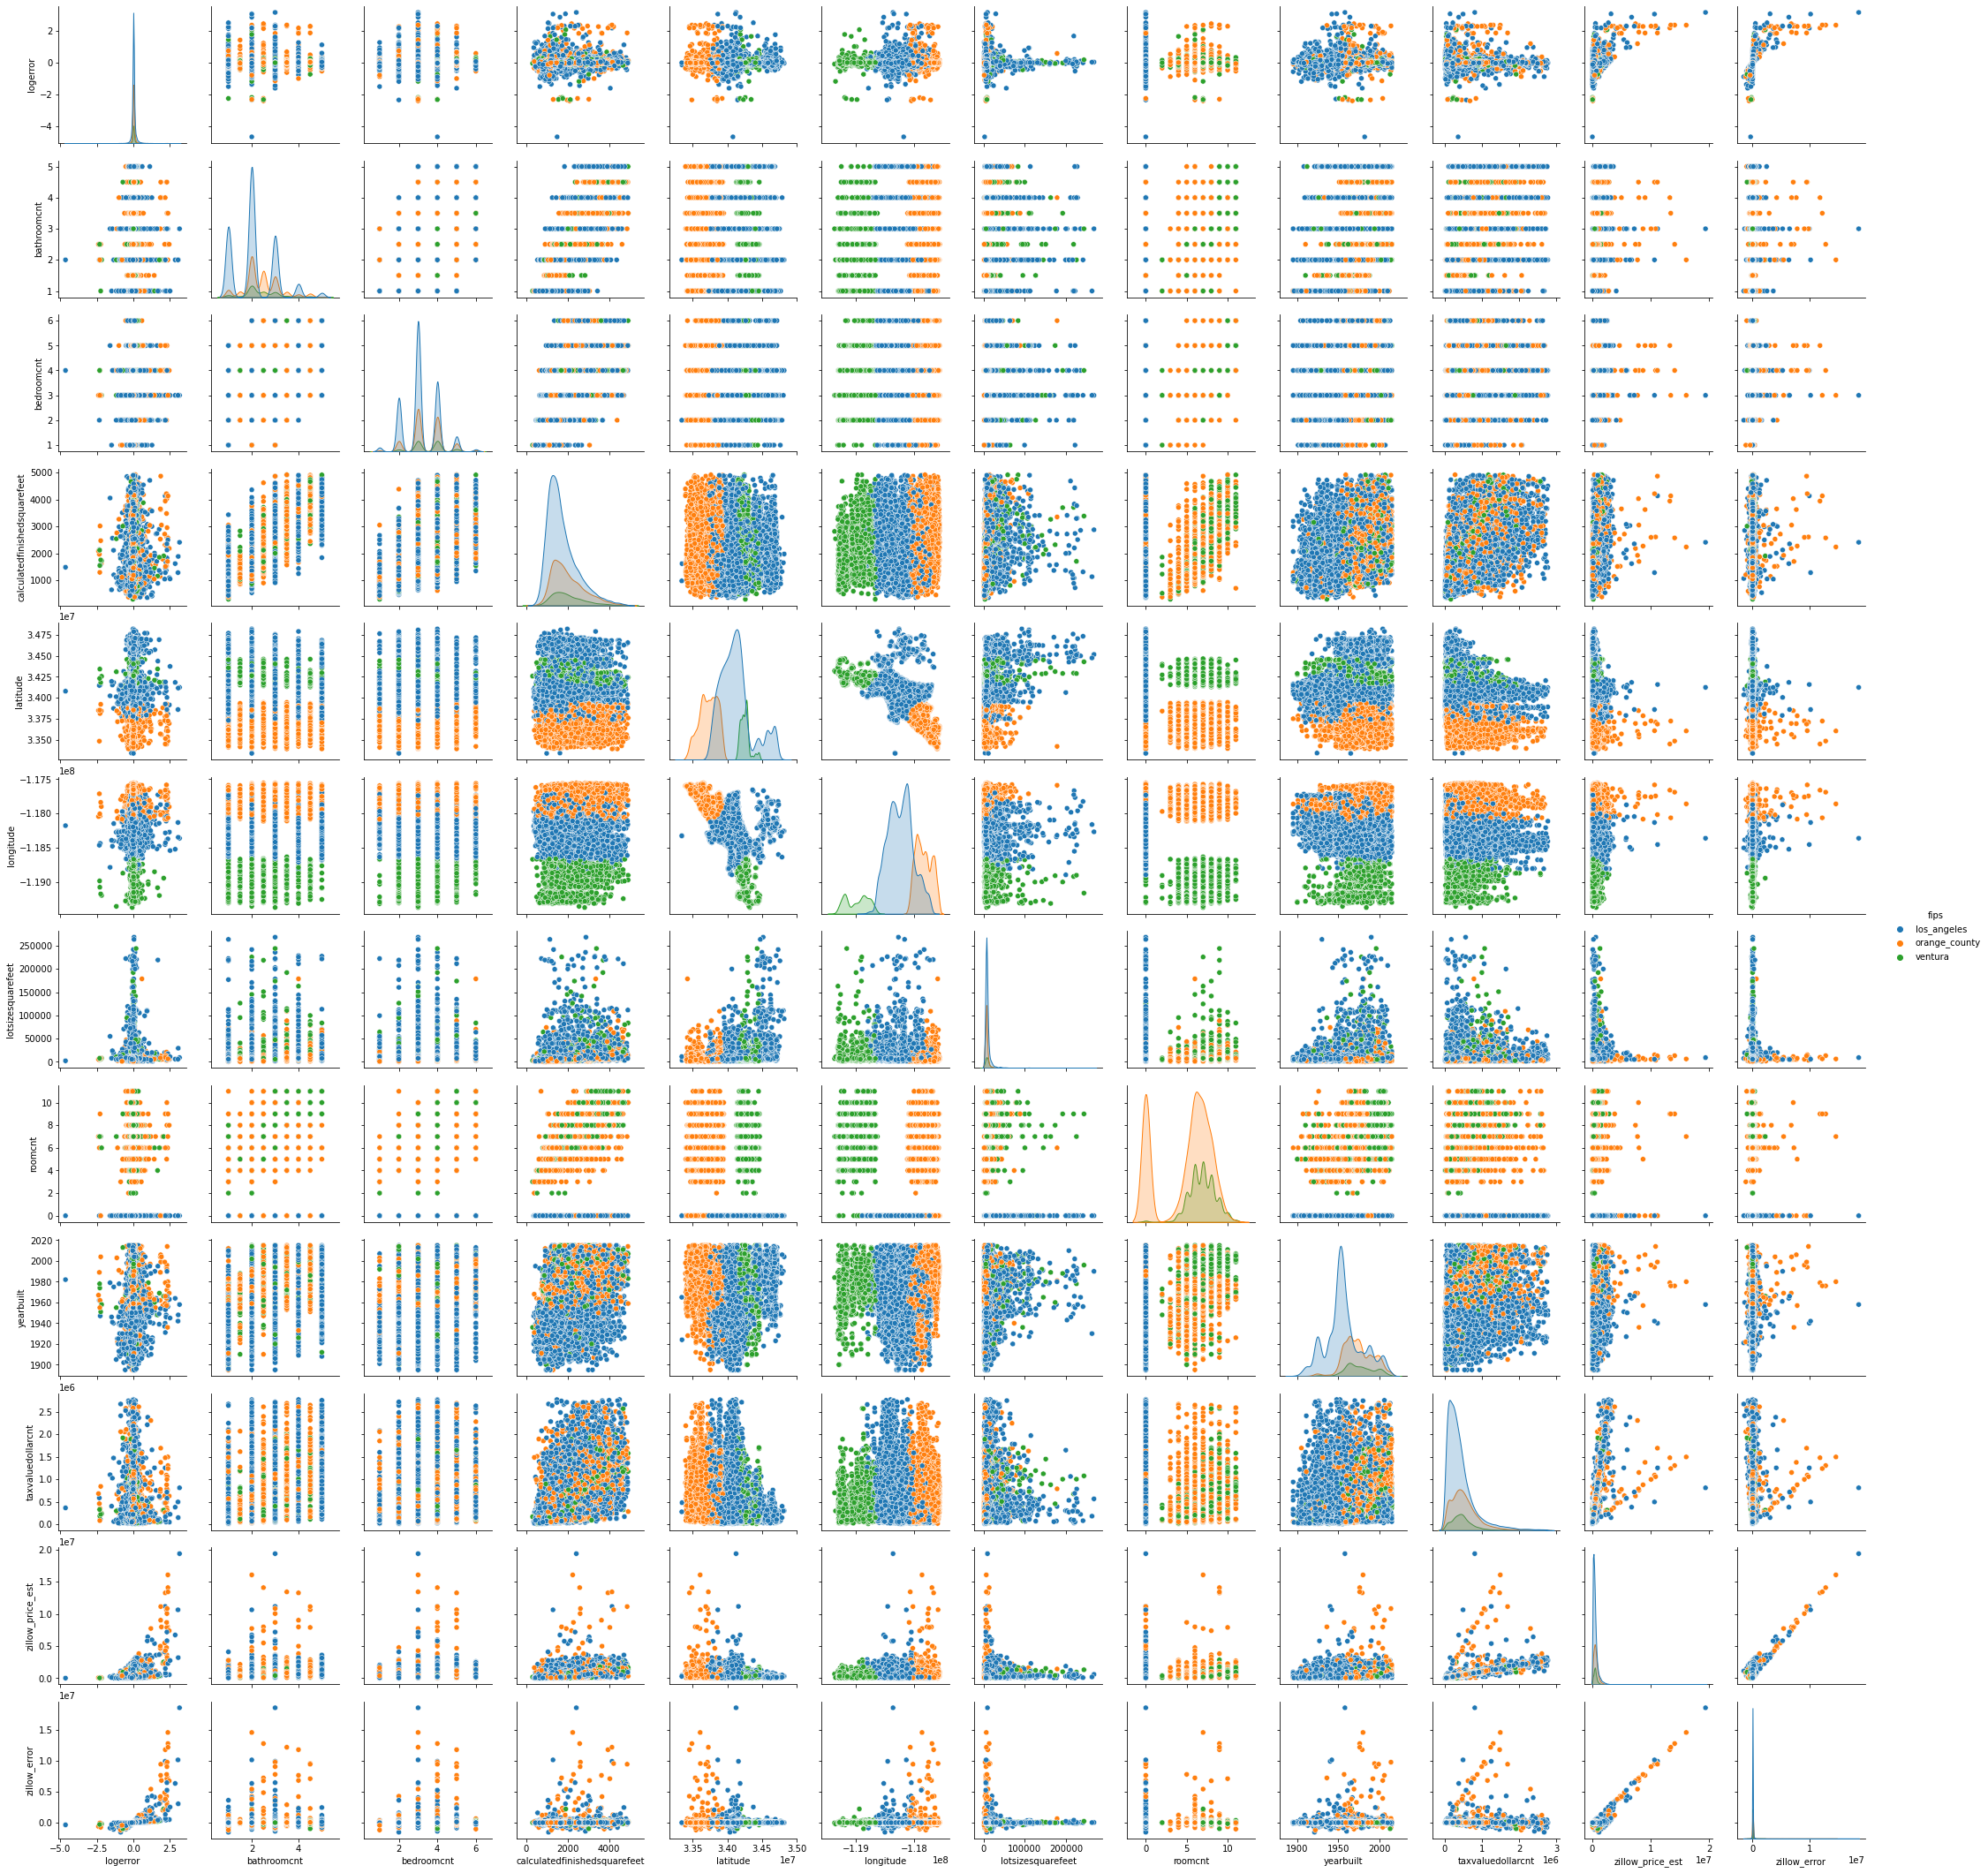

In [33]:
sns.pairplot(data=train, hue='fips')
plt.show()

# Questions I want to answer graphically and statistically:
1. Does high logerror occur more freguently in some counties than others, proportionally?
2. Does logerror have a relationship to certain sq_ft ranges?
3. Does high logerror occur more frequently, proportionally, at certain home price (taxvalue) ranges? Might be an opportunnity for further subsets
4. Is high logerror correlated to certain BD ranges?
5. Is high logerror correlated to certain BR ranges?
6. Is high logerror correlated to certain yearbuilt ranges?

In [53]:
# top 5% of train dataset (~3 std from mean)
high_outliers = train.logerror.quantile(q=0.95)
# top 16% of train dataset (~2 std from mean)
upper_mid_outliers = train.logerror.quantile(q=0.84)
# bottom 16 of train dataset (~2 std from mean)
lower_mid_outliers = train.logerror.quantile(q=0.16)
# bottom 5% percent of dataset (~3 std from mean)
low_outliers = train.logerror.quantile(q=0.05)


#upper-high outliers are top 5% of the data
train_high_outliers = train[train.logerror > high_outliers]
# mid-outliers are between 95-86 percentiles
train_upper_mid_outliers = train[(train.logerror < high_outliers) & (train.logerror > upper_mid_outliers)]
# center-mass data will be 86-16 percentiles
train_center_mass = train[(train.logerror < upper_mid_outliers) & (train.logerror > lower_mid_outliers)]
# lower mid will be 16-5 percentiles
train_lower_mid_outliers = train[(train.logerror < lower_mid_outliers) & (train.logerror > low_outliers)]
# low outliers are bottom 5% of data
train_low_outliers = train[train.logerror < low_outliers]



# Average churn in the population, by tenure
data1 = train
data2 = train_high_outliers
data3 = train_upper_mid_outliers
data4= train_center_mass
data5 = train_lower_mid_outliers
data6 = train_low_outliers


## Q1: Does high logerror occur more freguently in some counties than others, controlling for dataset size?

Text(0.5, 0.98, 'FIPS v. Logerror for (1) Population, (2) Center Mass, (3) High Outliers, \n(4) Upper-Mid Outliers, (5) Lower-Mid Outliers, (6) Low Outliers')

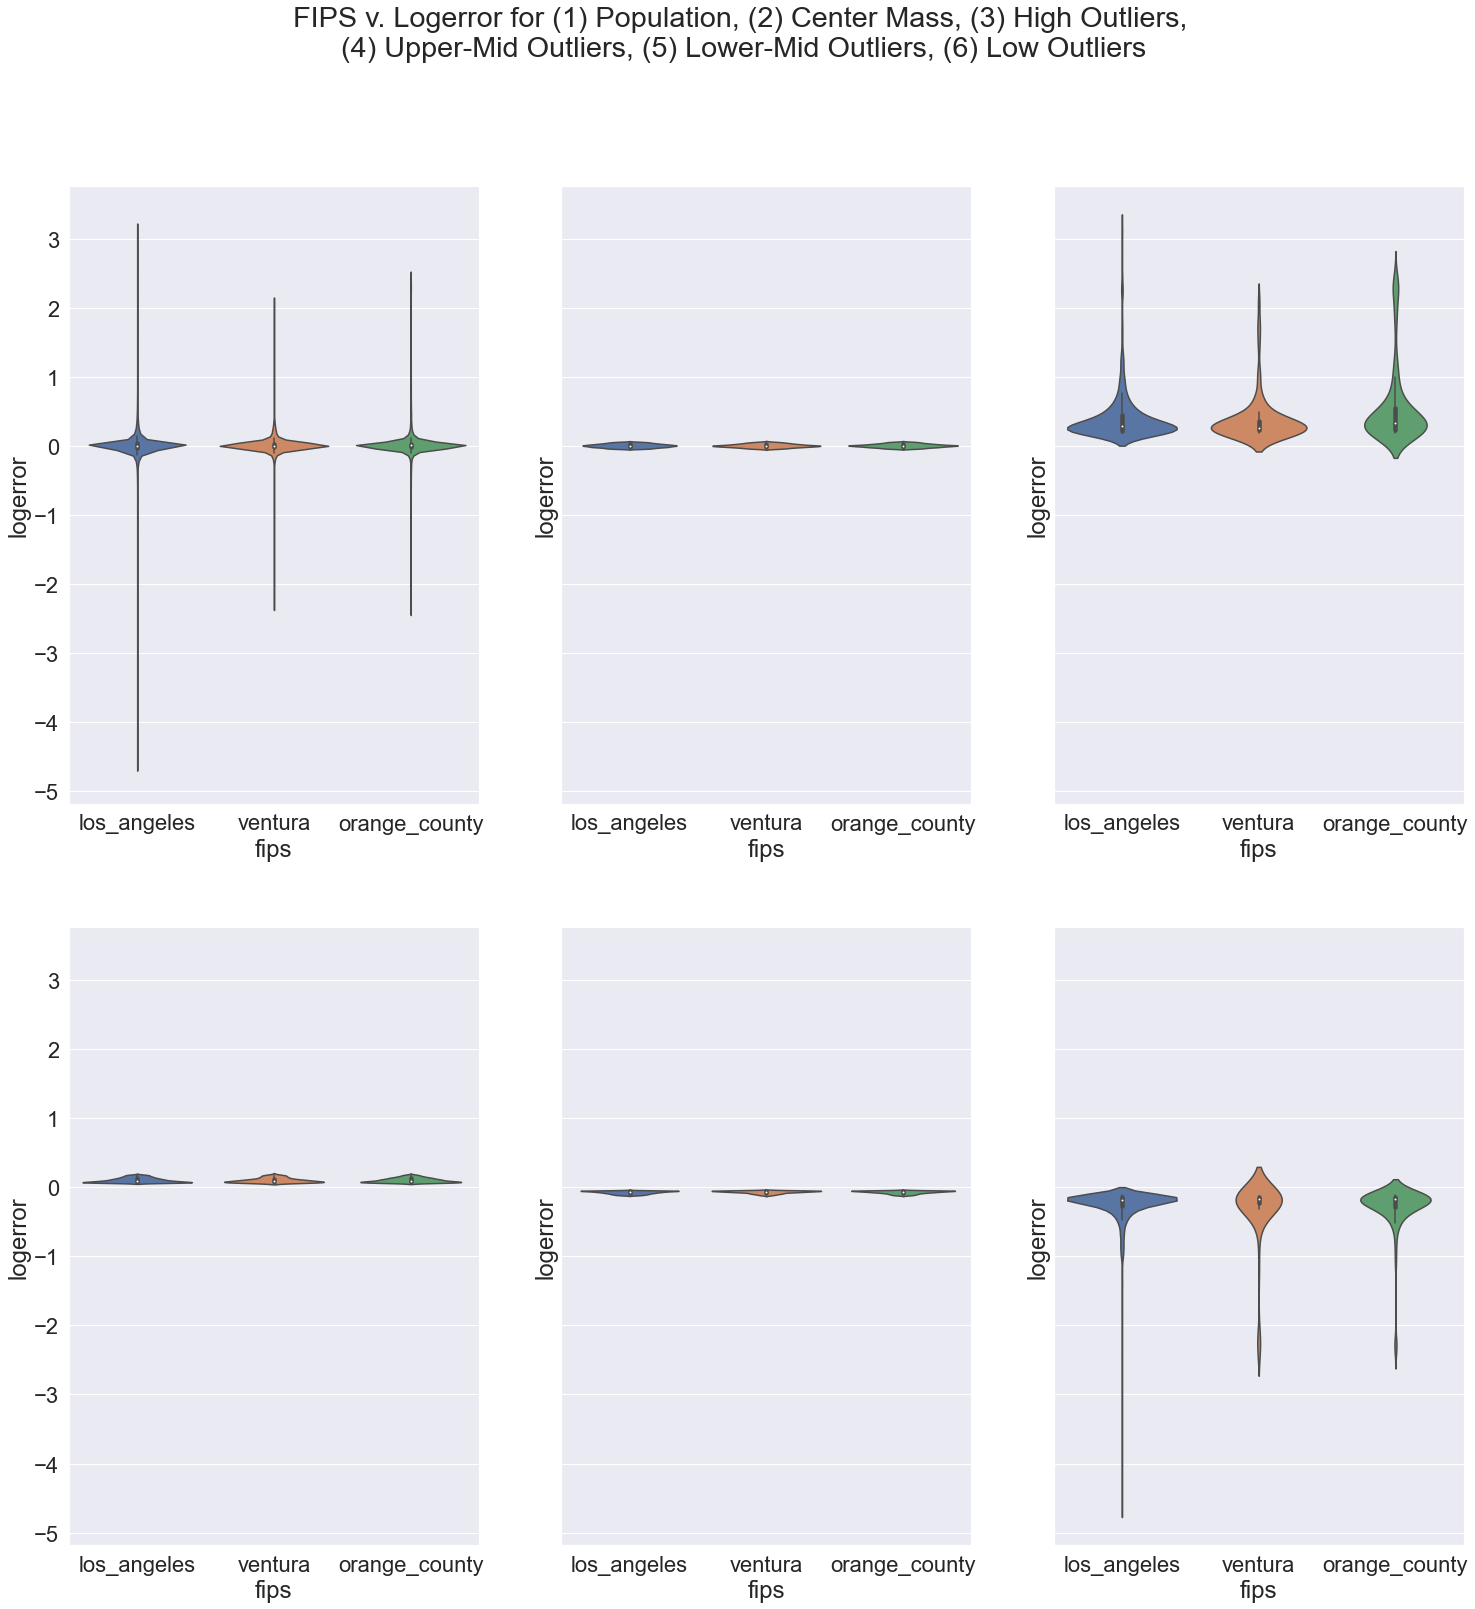

In [57]:
sns.set(font_scale = 2, rc={"figure.figsize":(25,25)})
fig, axes = plt.subplots(2, 3, sharey=True)

sns.violinplot(x='fips', y='logerror', data=data1, ax=axes[0,0], order=["los_angeles", "ventura", "orange_county"])
sns.violinplot(x='fips', y='logerror', data=data4, ax=axes[0,1], order=["los_angeles", "ventura", "orange_county"])
sns.violinplot(x='fips', y='logerror', data=data2, ax=axes[0,2], order=["los_angeles", "ventura", "orange_county"])
sns.violinplot(x='fips', y='logerror', data=data3, ax=axes[1,0], order=["los_angeles", "ventura", "orange_county"])
sns.violinplot(x='fips', y='logerror', data=data5, ax=axes[1,1], order=["los_angeles", "ventura", "orange_county"])
sns.violinplot(x='fips', y='logerror', data=data6, ax=axes[1,2], order=["los_angeles", "ventura", "orange_county"])
fig.suptitle("""FIPS v. Logerror for (1) Population, (2) Center Mass, (3) High Outliers, 
(4) Upper-Mid Outliers, (5) Lower-Mid Outliers, (6) Low Outliers""")

## Visual Takeaway: 
- it seems like between sets:
    - number_los_angeles_high_outliers > number_orange_county_high_outliers > number_ventura_high_outliers
    - number_los_angeles_low_outliers > number_orange_county_low_outliers > number_ventura_low_outliers
    - orange county has the greatest number of outliers > 1.5 logerror
- it seems like within sets:
    - los_angeles has more high outliers than low outliers, but the range of low outliers is greater than the range of high outliers (0:~-4.6)
    - same with ventura, but ventura has a less severe lower range (0:~-2.8)
    - orange_county is evenly balnaced, but has a flare in the upper outliers, from (1.5:2.8)

## Let's run statistical tests to determine if, proportionally, LA has a higher percentage of outliers of its data set than the other two counties
- I want to know if (LA_high_outliers/LA_data) > (ventura_high_outliers/ventura_data), and if (LA_high_outliers/LA_data) > (oc_high_outliers/oc_data)

    - Null hypothesis1: LA high outliers make up less/equal proportion of high outliers in comparison to Ventura county outliers
    - Alt hypothesis1: LA high outliers make up greater proportion of high outliers in comparison to Ventura county outliers

    - Null hypothesis2: LA high outliers make up less/equal proportion of high outliers in comparison to Orange County outliers
    - Alt hypothesis2: LA high outliers make up greater proportion of high outliers in comparison to Orange County outliers
    
- I want to know if (LA_low_outliers/LA_data) > (ventura_low_outliers/ventura_data), and if (LA_low_outliers/LA_data) > (oc_low_outliers/oc_data)
    - Null hypothesis1: LA low outliers make up less/equal proportion of low outliers in comparison to Ventura county outliers
    - Alt hypothesis1: LA low outliers make up greater proportion of low outliers in comparison to Ventura county outliers

    - Null hypothesis2: LA low outliers make up less/equal proportion of low outliers in comparison to Orange County outliers
    - Alt hypothesis2: LA low outliers make up greater proportion of low outliers in comparison to Orange County outliers

## Which test am I going to use?
- We are testing proportions and group membership on two categorical variables, so this will be a chi2 test.
- print the contingency taables 
- establish group membership
- answer: is one county more likely to be represented propotionally in the high outlier/low outlier data?

## A. For the positive, large outliers:

In [64]:
# first, get the contingency table of expected vs. observed porportions. 

#get the counts of the high outliers in each county
la_count = train_high_outliers[(train_high_outliers.fips=='los_angeles')].shape[0] 
ventura_count = train_high_outliers[(train_high_outliers.fips=='ventura')].shape[0] 
oc_count = train_high_outliers[(train_high_outliers.fips=='orange_county')].shape[0] 

#get the proportions of county high outliers in the total county dataset (should be about 5%) to see proportion of data in each county that is a logerror outlier
# (count of outliers in county)/(count of data in the county) = (outliers/county)*100 = the percentage of high outliers per county
la_county_prop = (la_count/ train[(train.fips=='los_angeles')].shape[0])*100 
ventura_county_prop = (ventura_count/train[(train.fips=='ventura')].shape[0]) *100
oc_county_prop = (oc_count/train[(train.fips=='orange_county')].shape[0]) *100

#get the proportions of county high outliers in the high outliers dataset to see proportion of high error outliers made up by each county
la_total_prop = (la_count/ train_high_outliers.shape[0])*100 
ventura_total_prop = (ventura_count/train_high_outliers.shape[0])*100
oc_total_prop = (oc_count/train_high_outliers.shape[0])*100

In [86]:

degf=2
index = ['Count', 'Proportion_of_County', 'Proportion_of_Total']
columns = ['Los_Angeles', 'Ventura', 'Orange_County']

observed = pd.DataFrame([[la_count, ventura_count, oc_count], 
                        [la_county_prop, ventura_county_prop, oc_county_prop],
                        [la_total_prop, ventura_total_prop, oc_total_prop]], 
                        index=index, columns=columns).round(2)
observed = observed.T
observed

Count  Proportion_of_County  Proportion_of_Total
Los_Angeles    1031.0                  5.61                72.66
Ventura          96.0                  4.04                 6.77
Orange_County   292.0                  3.83                20.58

                Count  Proportion_of_County  Proportion_of_Total
Los_Angeles    1031.0                  5.61                72.66
Ventura          96.0                  4.04                 6.77
Orange_County   292.0                  3.83                20.58
         0     1      2
0  1027.12  9.76  72.39
1    98.90  0.94   6.97
2   292.98  2.78  20.65
a is: 0.05
p is: 0.014005912116086837
we reject the null hypothesis that county and large, positive outlier membership are independent


([<matplotlib.axis.XTick at 0x7fa45c22e2e0>,
 [Text(0, 0, 'Los_Angeles'),
  Text(1, 0, 'Ventura'),
  Text(2, 0, 'Orange_County')])

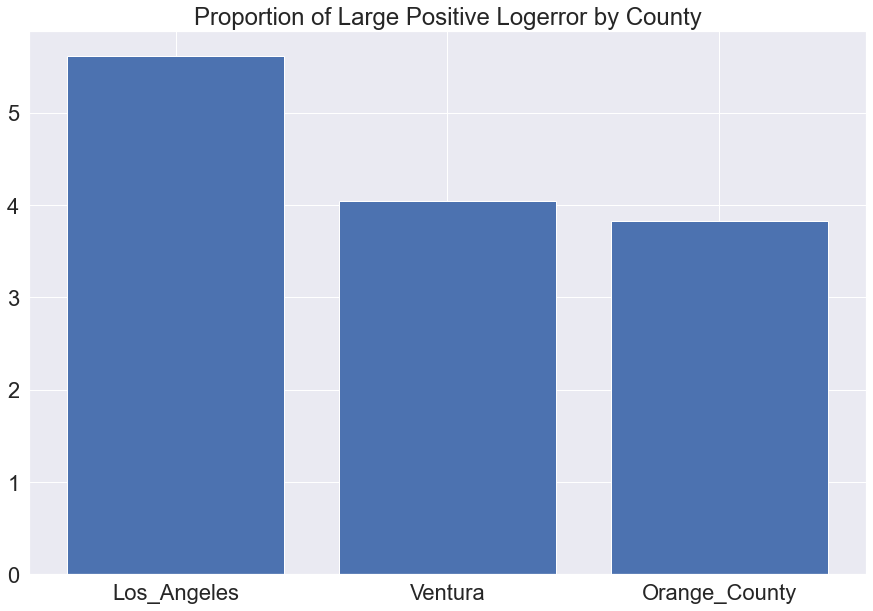

In [96]:
a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(observed)

expected_df = pd.DataFrame(expected.round(2))

print(observed)
print(expected_df)
print("a is:", a)
print("p is:", p)
if p < a:
    print("we reject the null hypothesis that county and large, positive outlier membership are independent")
#plt.bar(data=observed, x=observed.index, y=observed.Proportion_of_County, height=)
plt.figure(figsize=(15, 10))
plt.title("Proportion of Large Positive Logerror by County")
plt.bar([0,1,2], observed.Proportion_of_County, align ='center')
plt.xticks([0,1,2], observed.index)


In [85]:
observed.head().T

Count  Proportion_of_County  Proportion_of_Total
Los_Angeles    1099.0                  5.98                72.66
Ventura          73.0                  3.07                 6.77
Orange_County   247.0                  3.24                20.58

## A. Takeaway: LA County is between 20% and 30% more likely to have a large, postiive logerror than Ventura and Orange Counties.

## B. For the negative, large Outliers:

In [97]:
# first, get the contingency table of expected vs. observed porportions. 

#get the counts of the high outliers in each county
low_la_count = train_low_outliers[(train_low_outliers.fips=='los_angeles')].shape[0] 
low_ventura_count = train_low_outliers[(train_low_outliers.fips=='ventura')].shape[0] 
low_oc_count = train_low_outliers[(train_low_outliers.fips=='orange_county')].shape[0] 

#get the proportions of county high outliers in the total county dataset (should be about 5%) to see proportion of data in each county that is a logerror outlier
# (count of outliers in county)/(count of data in the county) = (outliers/county)*100 = the percentage of high outliers per county
low_la_county_prop = (low_la_count/ train[(train.fips=='los_angeles')].shape[0])*100 
low_ventura_county_prop = (low_ventura_count/train[(train.fips=='ventura')].shape[0]) *100
low_oc_county_prop = (low_oc_count/train[(train.fips=='orange_county')].shape[0]) *100

#get the proportions of county high outliers in the high outliers dataset to see proportion of high error outliers made up by each county
low_la_total_prop = (la_count/ train_low_outliers.shape[0])*100 
low_ventura_total_prop = (ventura_count/train_low_outliers.shape[0])*100
low_oc_total_prop = (oc_count/train_low_outliers.shape[0])*100

In [100]:

degf=2
index = ['Count', 'Proportion_of_County', 'Proportion_of_Total']
columns = ['Los_Angeles', 'Ventura', 'Orange_County']

observed = pd.DataFrame([[low_la_count, low_ventura_count, low_oc_count], 
                        [low_la_county_prop, low_ventura_county_prop, low_oc_county_prop],
                        [low_la_total_prop, low_ventura_total_prop, low_oc_total_prop]], 
                        index=index, columns=columns).round(2)
observed = observed.T
observed

Count  Proportion_of_County  Proportion_of_Total
Los_Angeles    1099.0                  5.98                72.66
Ventura          73.0                  3.07                 6.77
Orange_County   247.0                  3.24                20.58

                Count  Proportion_of_County  Proportion_of_Total
Los_Angeles    1099.0                  5.98                72.66
Ventura          73.0                  3.07                 6.77
Orange_County   247.0                  3.24                20.58
         0     1      2
0  1091.28  9.45  76.91
1    76.76  0.66   5.41
2   250.96  2.17  17.69
a is: 0.05
p is: 0.01849790378571455
we reject the null hypothesis that county and large, negative outlier membership are independent


([<matplotlib.axis.XTick at 0x7fa408b5da30>,
 [Text(0, 0, 'Los_Angeles'),
  Text(1, 0, 'Ventura'),
  Text(2, 0, 'Orange_County')])

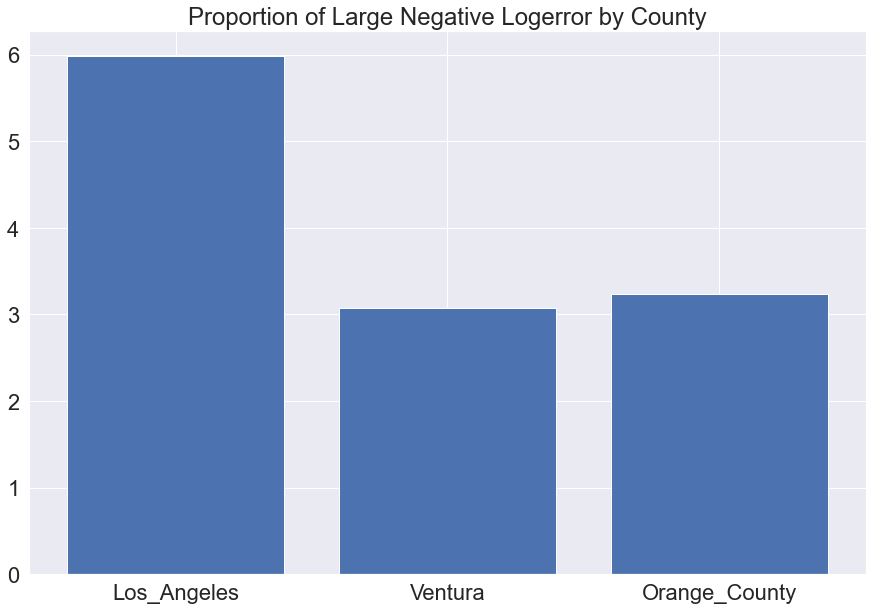

In [101]:
a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(observed)

expected_df = pd.DataFrame(expected.round(2))

print(observed)
print(expected_df)
print("a is:", a)
print("p is:", p)
if p < a:
    print("we reject the null hypothesis that county and large, negative outlier membership are independent")
#plt.bar(data=observed, x=observed.index, y=observed.Proportion_of_County, height=)
plt.figure(figsize=(15, 10))
plt.title("Proportion of Large Negative Logerror by County")
plt.bar([0,1,2], observed.Proportion_of_County, align ='center')
plt.xticks([0,1,2], observed.index)

## B. Takeaway: LA County is almost twice as likely as both of the other two counties to have a large negative logerror

## Q2: Is high logerror related to SQ FT?

Text(0.5, 0.98, 'SQFT v. Logerror for (1) Population, (2) <2500 SQFT, (3) >2500 SQFT')

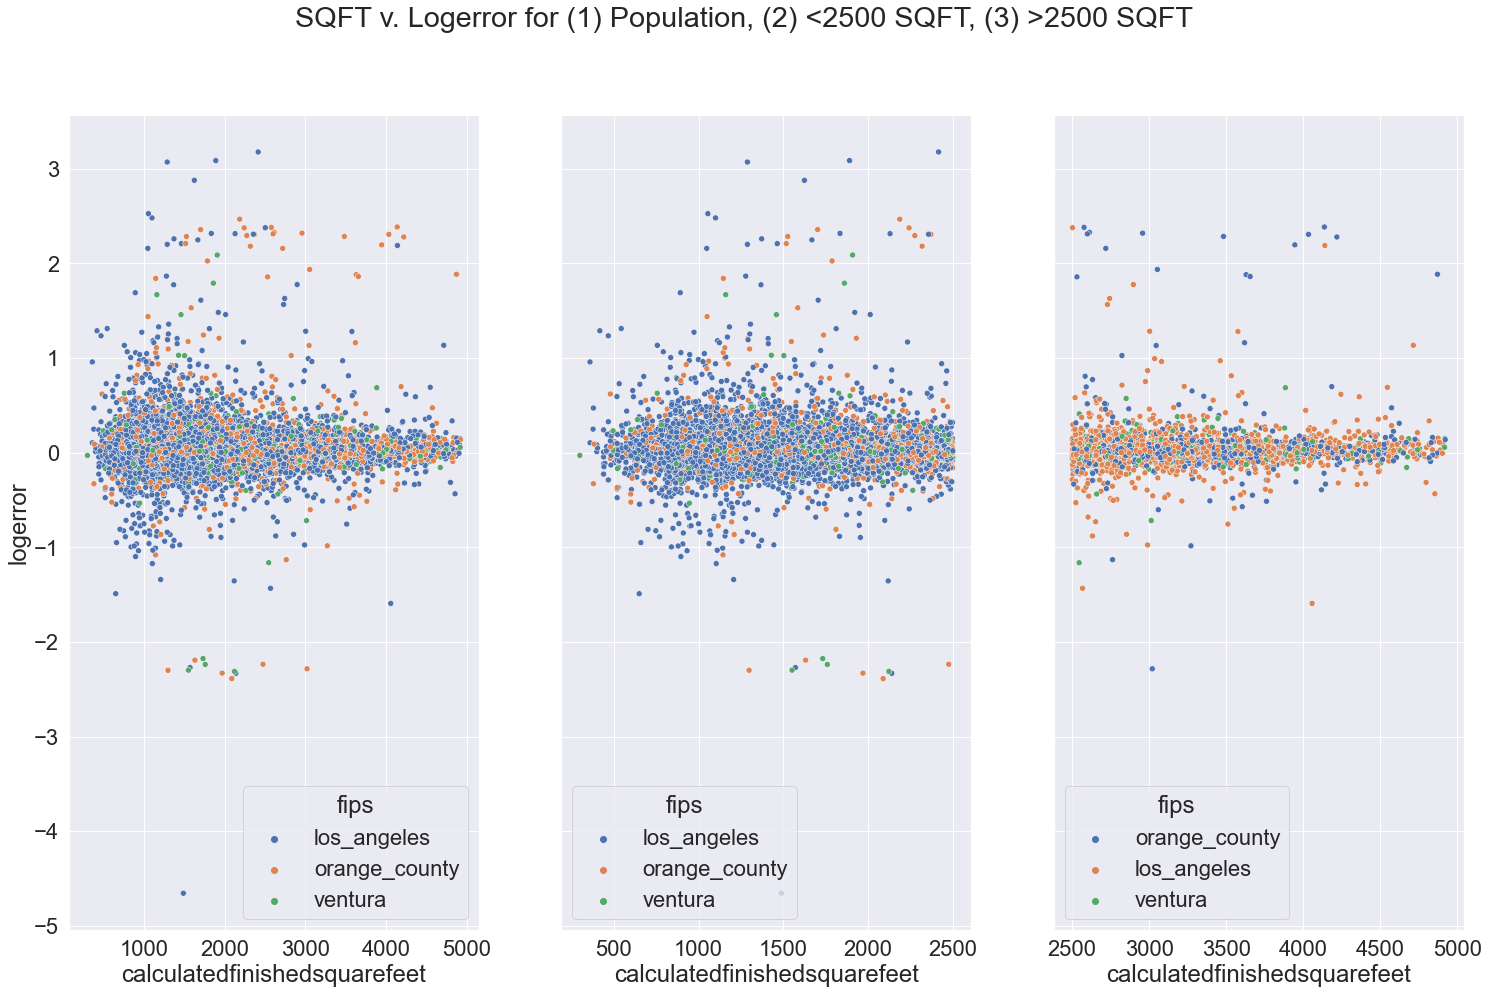

In [111]:
sns.set(font_scale = 2, rc={"figure.figsize":(25,15)})
fig, axes = plt.subplots(1, 3, sharey=True)

sns.scatterplot(y='logerror', x='calculatedfinishedsquarefeet', data=train, ax=axes[0], hue='fips')
sns.scatterplot(y='logerror', x='calculatedfinishedsquarefeet', data=train[train.calculatedfinishedsquarefeet < 2500], ax=axes[1], hue='fips')
sns.scatterplot(y='logerror', x='calculatedfinishedsquarefeet', data=train[train.calculatedfinishedsquarefeet > 2500], ax=axes[2], hue='fips')
fig.suptitle("""SQFT v. Logerror for (1) Population, (2) <2500 SQFT, (3) >2500 SQFT""")

## Takeaways:
- homes above 2500 SQ FT appear to have lower mean logerror.
- lets test statistically, (1 tail, indep t-test)
- then let's throw some clusters at this
- build menaningful clusters
- name the clusters
- run linear regresssion on those clusters

In [112]:
train['abs_logerror'] = train.logerror.abs()
train.head()

logerror transactiondate  bathroomcnt  bedroomcnt  \
3323  -0.021395      2017-01-24          2.0         3.0   
2470  -0.023569      2017-01-18          1.0         2.0   
7019  -0.083987      2017-02-16          3.0         4.0   
50112 -0.039345      2017-09-06          3.0         3.0   
48192 -0.048605      2017-08-29          2.0         5.0   

       calculatedfinishedsquarefeet         fips    latitude    longitude  \
3323                         1115.0  los_angeles  34212796.0 -118543472.0   
2470                         1754.0  los_angeles  34105205.0 -118108463.0   
7019                         2497.0  los_angeles  34465169.0 -118494179.0   
50112                        1780.0  los_angeles  34567611.0 -118172344.0   
48192                        1875.0  los_angeles  33966020.0 -118023774.0   

       lotsizesquarefeet  roomcnt  yearbuilt  taxvaluedollarcnt logerror_bins  \
3323             13043.0      0.0     1956.0           254647.0  (-0.25, 0.0]   
2470              8666.0      0.0     1938.0           582447.0  (-0.25, 0.0]   
7019             18496.0      0.0     1989.0           462901.0  (-0.25, 0.0]   
50112             5069.0      0.0     2005.0           260000.0  (-0.25, 0.0]   
48192             5940.0      0.0     1951.0           522149.0  (-0.25, 0.0]   

       zillow_price_est  zillow_error  abs_logerror  
3323      249256.585265  -5390.414735      0.021395  
2470      568879.837510 -13567.162490      0.023569  
7019      425611.362951 -37289.637049      0.083987  
50112     249968.984278 -10031.015722      0.039345  
48192     497376.640046 -24772.359954      0.048605

## Test Statistically:
- Null hypothesis: the mean absolute logerror of homes >2500 SQFT is greater than the mean of homes <=2500 SQFT
- Alt hypothesis: homes >2500 SQFT have a lower mean log error than homes <=2500 SQ FT


In [119]:
# this is a one tailed t-test, so p/2 needs to be < a, and t>0
a = 0.05
train.calculatedfinishedsquarefeet[train.calculatedfinishedsquarefeet > 2500].count()

5067

In [120]:
train.calculatedfinishedsquarefeet[train.calculatedfinishedsquarefeet > 2500].var()

290266.7685040197

In [118]:
train.calculatedfinishedsquarefeet[train.calculatedfinishedsquarefeet < 2500].count()

23303

In [121]:
train.calculatedfinishedsquarefeet[train.calculatedfinishedsquarefeet < 2500].var()

197393.1439023926

In [165]:
big_house = train[train.calculatedfinishedsquarefeet > 2500]
little_house = train[train.calculatedfinishedsquarefeet < 2500]

big_house_mean_error = train.abs_logerror[train.calculatedfinishedsquarefeet > 2500]
little_house_mean_error = train.abs_logerror[train.calculatedfinishedsquarefeet < 2500]

little_house_mean_error.mean(), big_house_mean_error.mean()

(0.0687252901223104, 0.0738345634686237)

In [167]:
t, p = stats.ttest_ind(little_house_mean_error, big_house_mean_error, equal_var=False)

print(f"""t = {t}, p/2 = {p/2}, a = {a}""")

t = -1.9842292451349162, p/2 = 0.02363507522790706, a = 0.05


In [168]:
if (p/2 < a) and (t > 0):
    print("We reject the null hypothesis thatthe mean absolute logerror of homes >2500 SQFT is greater than the mean of homes <=2500 SQFT")
else:
    print("We reject the Alt hypothesis that homes >2500 SQFT have a lower mean log error than homes <=2500 SQ FT")

We reject the Alt hypothesis that homes >2500 SQFT have a lower mean log error than homes <=2500 SQ FT


## Q3: Is high logerror related to YR BUILT?

In [132]:
train.yearbuilt.mean()

1962.8208301519005

In [133]:
train.yearbuilt.median()

1960.0

Text(0.5, 0.98, 'YRBUILT v. Logerror for (1) Population, (2) 1900-40 (3) 1940-80 (4)1981-2017-')

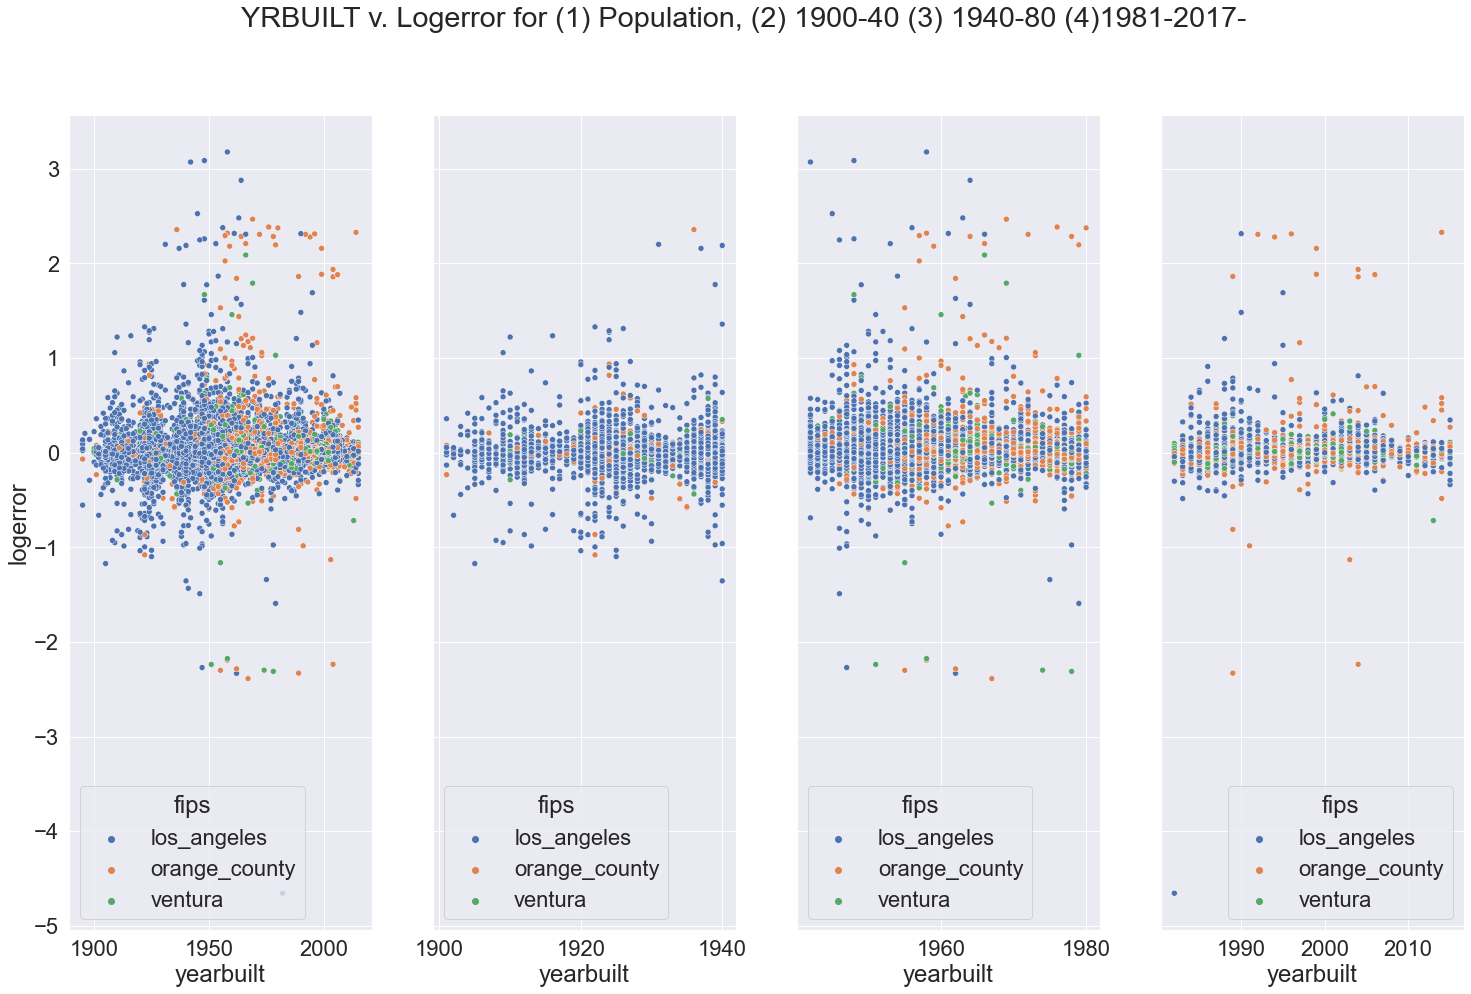

In [153]:
sns.set(font_scale = 2, rc={"figure.figsize":(25,15)})
fig, axes = plt.subplots(1, 4, sharey=True)

sns.scatterplot(y='logerror', x='yearbuilt', data=train, ax=axes[0], hue='fips')
sns.scatterplot(y='logerror', x='yearbuilt', data=train[(train.yearbuilt > 1900) & (train.yearbuilt < 1941)] , ax=axes[1], hue='fips')
sns.scatterplot(y='logerror', x='yearbuilt', data=train[(train.yearbuilt > 1941) & (train.yearbuilt < 1981)] , ax=axes[2], hue='fips')
sns.scatterplot(y='logerror', x='yearbuilt', data=train[(train.yearbuilt > 1981) & (train.yearbuilt < 2018)] , ax=axes[3], hue='fips')
fig.suptitle("""YRBUILT v. Logerror for (1) Population, (2) 1900-40 (3) 1940-80 (4)1981-2017-""")

## Takeaways:
- homes above 2500 SQ FT appear to have lower mean logerror.
- lets test statistically, (1 tail, indep t-test)
- then let's throw some clusters at this
- build menaningful clusters
- name the clusters
- run linear regresssion on those clusters

In [ ]:
train['abs_logerror'] = train.logerror.abs()
train.head()

logerror transactiondate  bathroomcnt  bedroomcnt  \
3323  -0.021395      2017-01-24          2.0         3.0   
2470  -0.023569      2017-01-18          1.0         2.0   
7019  -0.083987      2017-02-16          3.0         4.0   
50112 -0.039345      2017-09-06          3.0         3.0   
48192 -0.048605      2017-08-29          2.0         5.0   

       calculatedfinishedsquarefeet         fips    latitude    longitude  \
3323                         1115.0  los_angeles  34212796.0 -118543472.0   
2470                         1754.0  los_angeles  34105205.0 -118108463.0   
7019                         2497.0  los_angeles  34465169.0 -118494179.0   
50112                        1780.0  los_angeles  34567611.0 -118172344.0   
48192                        1875.0  los_angeles  33966020.0 -118023774.0   

       lotsizesquarefeet  roomcnt  yearbuilt  taxvaluedollarcnt logerror_bins  \
3323             13043.0      0.0     1956.0           254647.0  (-0.25, 0.0]   
2470              8666.0      0.0     1938.0           582447.0  (-0.25, 0.0]   
7019             18496.0      0.0     1989.0           462901.0  (-0.25, 0.0]   
50112             5069.0      0.0     2005.0           260000.0  (-0.25, 0.0]   
48192             5940.0      0.0     1951.0           522149.0  (-0.25, 0.0]   

       zillow_price_est  zillow_error  abs_logerror  
3323      249256.585265  -5390.414735      0.021395  
2470      568879.837510 -13567.162490      0.023569  
7019      425611.362951 -37289.637049      0.083987  
50112     249968.984278 -10031.015722      0.039345  
48192     497376.640046 -24772.359954      0.048605

## Test Statistically:
### 1900-40 abs mean error < 1981-2017 abs mean error < 1941-80 abs mean error:
- Null hypothesis1: the mean absolute logerror of homes built (1900-40) is greater than/equal to the mean abs error of homes built(1941-1980)
- Alt hypothesis1: the mean absolute logerror of homes built (1900-40) is less than the mean abs error of homes built(1941-1980)
- 

- Null hypothesis2: the mean absolute logerror of homes built (1941-80) is less than/equal to the mean abs error of homes built (1981-2017)
- Alt hypothesis2: the mean absolute logerror of homes built (1941-80) is greater than the mean abs error of homes built (1981-2017)

- Null hypothesis3: the mean absolute logerror of homes built (1981-2017) is less than/equal to  than the mean abs error of homes built (1941-1980)
- Alt hypothesis3: the mean absolute logerror of homes built (1981-2017) is greater than the mean abs error of homes built (1941-1980)


In [141]:
# these are one tailed t-tests, so p/2 needs to be < a, and t>0
a = 0.05

0.06965585983399218

In [157]:
old_house = train[(train.yearbuilt > 1900) & (train.yearbuilt < 1941)]
mid_house = train[(train.yearbuilt > 1941) & (train.yearbuilt < 1981)]
new_house = train[(train.yearbuilt > 1981) & (train.yearbuilt < 2018)]

old_house_mean_error = old_house.abs_logerror
mid_house_mean_error = mid_house.abs_logerror
new_house_mean_error = new_house.abs_logerror

old_house_mean_error.mean(), mid_house_mean_error.mean(), new_house_mean_error.mean()

# now t test the means to get statistical significance

(0.10145771259675256, 0.06811438561101696, 0.05253258556584618)

### 1. Check samples for equal variance

In [155]:
old_house.abs_logerror.var(), mid_house.abs_logerror.var(), new_house.abs_logerror.var() 

(0.027829341053368435, 0.023139112528598623, 0.019849685921271346)

In [163]:
### - Null hypothesis1: the mean absolute logerror of homes built (1900-40) is greater than/equal to the mean abs error of homes built(1941-1980)
### - Alt hypothesis1: the mean absolute logerror of homes built (1900-40) is less than the mean abs error of homes built(1941-1980)
t, p = stats.ttest_ind(mid_house_mean_error, old_house_mean_error, equal_var=True)

print(f"""t = {t}, p/2 = {p/2}, a = {a}""")
if t >= 0:
    print("the mean logerror of homes built 1941-80 is greater than the mean logerror of homes built 1900-40")
else:
    print("the mean logerror of homes built 1900-40 is greater than the mean logerror of homes built 1941-80")
if (p/2 < a) and (t > 0):
    print("I reject the null hypothesis, that the mean absolute logerror of homes built (1900-40) is greater than/equal to the mean abs error of homes built(1941-1980)")
else:
    print("I reject the alternate hypothesis, that the mean absolute logerror of homes built (1900-40) is less than the mean abs error of homes built(1941-1980)")

t = -12.289047007765134, p/2 = 6.755435219931541e-35, a = 0.05
the mean logerror of homes built 1900-40 is greater than the mean logerror of homes built 1941-80
I reject the alternate hypothesis, that the mean absolute logerror of homes built (1900-40) is less than the mean abs error of homes built(1941-1980)


### Takeaway 1: mean LOGERROR is higher for homes built 1900-40 than for homes built 1941-80

### 2. Now that we know 1900-40 has the highest logerror so far, test the lesser (1940-80) against the remaining datset (1981-2017)

In [164]:
### - Null hypothesis1: the mean absolute logerror of homes built (1941-80) is greater than/equal to the mean abs error of homes built(1981-2017)
### - Alt hypothesis1: the mean absolute logerror of homes built (1941-80) is less than the mean abs error of homes built(1981-2017)
t, p = stats.ttest_ind(mid_house_mean_error, new_house_mean_error, equal_var=True)

print(f"""t = {t}, p/2 = {p/2}, a = {a}""")
if t >= 0:
    print("the mean logerror of homes built 1941-80 is greater than the mean logerror of homes built 1981-2017")
else:
    print("the mean logerror of homes built 1980-2017 is less than the mean logerror of homes built 1900-40")
if (p/2 < a) and (t < 0):
    print("I reject the null hypothesis, that the mean absolute logerror of homes built (1941-80) is greater than/equal to the mean abs error of homes built(1981-2017)")
else:
    print("I reject the alternate hypothesis, that the mean absolute logerror of homes built (1941-80) is less than the mean abs error of homes built(1981-2017)")


t = 7.052171119868797, p/2 = 9.047140903815048e-13, a = 0.05
the mean logerror of homes built 1941-80 is greater than the mean logerror of homes built 1981-2017
I reject the alternate hypothesis, that the mean absolute logerror of homes built (1941-80) is less than the mean abs error of homes built(1981-2017)


### Takeaway2: the mean absolute LOGERROR for homes built 1941-80 > mean absolute LOGERROR for homes built 1981-2017

### Final Ranking of YRBUILT mean LOGERRORs:
>> mean logerror for homes is grouped into to the following bands: 1900-40 > 1941-1980 > 1981-2017

In [ ]:
### Takeaway 1: mean LOGERROR is higher for homes built 1900-40 than for homes built 1941-80

In [ ]:
if p/2 < a:
    print("We reject the null hypothesis that mean absolute logerror is greater for Single Family Homes <2500 SQ FT")

We reject the null hypothesis that mean absolute logerror is greater for Single Family Homes <2500 SQ FT


## Takeaways from subsetting:
- in terms of logerror:
    - big house > small house
    - old house > mid house > new house
    - la house > ventura house ~= oc house (ventura had more high outliers, but oc had more propotional low outliers)


## I have 3 diemnsions to create subsets along:
- 1. YRBUILT:1900-40, 1941-1980, 1981-2017
- 2. FIPS: los_angeles, ventura, orange_county
- 3. SQFT: >2500, <2500

In [169]:
# due to similarity in logerror, group oc and ventura together into the non-LA category
la_house = train[train.fips == 'los_angeles']
non_la_house = train[train.fips != 'los_angeles']

In [ ]:
house_age_range = [old_house, mid_house, new_house]
house_size_range = [big_house, little_house]
house_county = [la_house, non_la_house]

In [230]:
train = train.drop(columns='transactiondate')
train.head()

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
3323  -0.021395          2.0         3.0                        1115.0   
2470  -0.023569          1.0         2.0                        1754.0   
7019  -0.083987          3.0         4.0                        2497.0   
50112 -0.039345          3.0         3.0                        1780.0   
48192 -0.048605          2.0         5.0                        1875.0   

              fips    latitude    longitude  lotsizesquarefeet  roomcnt  \
3323   los_angeles  34212796.0 -118543472.0            13043.0      0.0   
2470   los_angeles  34105205.0 -118108463.0             8666.0      0.0   
7019   los_angeles  34465169.0 -118494179.0            18496.0      0.0   
50112  los_angeles  34567611.0 -118172344.0             5069.0      0.0   
48192  los_angeles  33966020.0 -118023774.0             5940.0      0.0   

       yearbuilt  taxvaluedollarcnt logerror_bins  zillow_price_est  \
3323      1956.0           254647.0  (-0.25, 0.0]     249256.585265   
2470      1938.0           582447.0  (-0.25, 0.0]     568879.837510   
7019      1989.0           462901.0  (-0.25, 0.0]     425611.362951   
50112     2005.0           260000.0  (-0.25, 0.0]     249968.984278   
48192     1951.0           522149.0  (-0.25, 0.0]     497376.640046   

       zillow_error  abs_logerror    house_type  
3323   -5390.414735      0.021395  mid_la_small  
2470  -13567.162490      0.023569  old_la_small  
7019  -37289.637049      0.083987  new_la_small  
50112 -10031.015722      0.039345  new_la_small  
48192 -24772.359954      0.048605  mid_la_small

In [211]:
def make_house_type(train):
    string1 = ""
    string2 = ""
    string3 = ""

    if train.yearbuilt < 1940:
        string1 = 'old'
    elif train.yearbuilt >1940 and train.yearbuilt < 1981:
        string1 = 'mid'
    else:
        string1=  'new'

    if train.fips == 'los_angeles':
        string2 = 'la'
    else:
        string2 = 'not_la'
    
    if train.calculatedfinishedsquarefeet < 2500:
        string3 = 'small'
    else:
        string3 = 'big'

    total = "_".join([string1, string2, string3])

    return total


train['house_type'] = train.apply(make_house_type, axis=1)

train.house_type.head(10)


3323       mid_la_small
2470       old_la_small
7019       new_la_small
50112      new_la_small
48192      mid_la_small
6077       new_la_small
50568      mid_la_small
7071     new_not_la_big
12089      old_la_small
34593      mid_la_small
Name: house_type, dtype: object

In [245]:
train.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet', 'roomcnt',
       'yearbuilt', 'taxvaluedollarcnt', 'logerror_bins', 'zillow_price_est',
       'zillow_error', 'abs_logerror', 'house_type'],
      dtype='object')

In [292]:
validate.columns

Index(['logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt',
       'logerror_bins', 'zillow_price_est', 'zillow_error'],
      dtype='object')

In [252]:
train_ready = train.drop(columns=['fips', 'taxvaluedollarcnt', 'logerror_bins', 'zillow_price_est',
       'zillow_error', 'abs_logerror', 'latitude', 'longitude'])
train_ready.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28376 entries, 3323 to 28585
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      28376 non-null  float64
 1   bathroomcnt                   28376 non-null  float64
 2   bedroomcnt                    28376 non-null  float64
 3   calculatedfinishedsquarefeet  28376 non-null  float64
 4   lotsizesquarefeet             28376 non-null  float64
 5   roomcnt                       28376 non-null  float64
 6   yearbuilt                     28376 non-null  float64
 7   house_type                    28376 non-null  object 
dtypes: float64(7), object(1)
memory usage: 3.0+ MB


In [253]:

train_encoded = wrangle.encode_zillow(train_ready)
train_encoded.head()

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
3323  -0.021395          2.0         3.0                        1115.0   
2470  -0.023569          1.0         2.0                        1754.0   
7019  -0.083987          3.0         4.0                        2497.0   
50112 -0.039345          3.0         3.0                        1780.0   
48192 -0.048605          2.0         5.0                        1875.0   

       lotsizesquarefeet  roomcnt  yearbuilt  house_type_mid_la_big  \
3323             13043.0      0.0     1956.0                      0   
2470              8666.0      0.0     1938.0                      0   
7019             18496.0      0.0     1989.0                      0   
50112             5069.0      0.0     2005.0                      0   
48192             5940.0      0.0     1951.0                      0   

       house_type_mid_la_small  house_type_mid_not_la_big  \
3323                         1                          0   
2470                         0                          0   
7019                         0                          0   
50112                        0                          0   
48192                        1                          0   

       house_type_mid_not_la_small  house_type_new_la_big  \
3323                             0                      0   
2470                             0                      0   
7019                             0                      0   
50112                            0                      0   
48192                            0                      0   

       house_type_new_la_small  house_type_new_not_la_big  \
3323                         0                          0   
2470                         0                          0   
7019                         1                          0   
50112                        1                          0   
48192                        0                          0   

       house_type_new_not_la_small  house_type_old_la_big  \
3323                             0                      0   
2470                             0                      0   
7019                             0                      0   
50112                            0                      0   
48192                            0                      0   

       house_type_old_la_small  house_type_old_not_la_big  \
3323                         0                          0   
2470                         1                          0   
7019                         0                          0   
50112                        0                          0   
48192                        0                          0   

       house_type_old_not_la_small  
3323                             0  
2470                             0  
7019                             0  
50112                            0  
48192                            0

In [254]:
house_type_dict = {}

for house_type in train.house_type.unique():
    house_type_dict[house_type] = train[train.house_type == house_type]

print(house_type_dict)


{'mid_la_small':        logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
3323  -0.021395          2.0         3.0                        1115.0   
48192 -0.048605          2.0         5.0                        1875.0   
50568 -0.005660          2.0         3.0                        1289.0   
34593 -0.034760          2.0         3.0                        1696.0   
35861  0.031143          2.0         3.0                        1794.0   
...         ...          ...         ...                           ...   
42222 -0.004390          2.0         2.0                        1473.0   
20460  0.148646          2.0         2.0                        1183.0   
7940  -0.029997          2.0         4.0                        1360.0   
18738 -0.054123          2.0         3.0                        1705.0   
28585 -0.106998          1.0         2.0                         796.0   

              fips    latitude    longitude  lotsizesquarefeet  roomcnt  \
3323   los_angeles 

## 3. Exploration with clustering: Let's see if clustering on the help group logerror along the statistically observed outcomes

### columns to use in clustering:
- 'logerror ','transactiondate', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'house_type'
- get encoded variable for house_type, then scale the data

In [271]:
scaler = sklearn.preprocessing.MinMaxScaler()

train_encoded_scaled, validate_scaled, test_scaled = wrangle.fit_and_scale(scaler,train_encoded,validate, test)
train_encoded_scaled.head()

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0  0.591746         0.25         0.4                      0.176331   
1  0.591468         0.00         0.2                      0.314582   
2  0.583753         0.50         0.6                      0.475335   
3  0.589454         0.50         0.4                      0.320208   
4  0.588271         0.25         0.8                      0.340762   

   lotsizesquarefeet  roomcnt  yearbuilt  
0           0.046697      0.0   0.508333  
1           0.030350      0.0   0.358333  
2           0.067063      0.0   0.783333  
3           0.016915      0.0   0.916667  
4           0.020168      0.0   0.466667

In [272]:
from sklearn.cluster import KMeans

X = train_encoded_scaled
kmeans = KMeans(n_clusters = 4)

kmeans.fit(X)
kmeans.predict(X)
kmeans.cluster_centers_


array([[5.96264098e-01, 3.76182832e-02, 2.63940520e-01, 1.72823550e-01,
        2.33901245e-02, 3.19057421e-02, 3.71185323e-01],
       [5.96872371e-01, 3.32041214e-01, 4.97946033e-01, 3.48523421e-01,
        2.91761696e-02, 6.28784828e-01, 6.26439246e-01],
       [5.97592068e-01, 5.84058760e-01, 6.10482408e-01, 5.44068307e-01,
        4.33222822e-02, 3.34685264e-03, 7.40904969e-01],
       [5.96257102e-01, 2.87361769e-01, 4.43686151e-01, 2.88908599e-01,
        3.10809058e-02, 1.81913926e-04, 5.35965766e-01]])

In [273]:

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0  0.596264     0.037618    0.263941                      0.172824   
1  0.596872     0.332041    0.497946                      0.348523   
2  0.597592     0.584059    0.610482                      0.544068   
3  0.596257     0.287362    0.443686                      0.288909   

   lotsizesquarefeet   roomcnt  yearbuilt  
0           0.023390  0.031906   0.371185  
1           0.029176  0.628785   0.626439  
2           0.043322  0.003347   0.740905  
3           0.031081  0.000182   0.535966

In [274]:
train_encoded_scaled['cluster'] = kmeans.predict(X)
train_encoded_scaled.head()

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0  0.591746         0.25         0.4                      0.176331   
1  0.591468         0.00         0.2                      0.314582   
2  0.583753         0.50         0.6                      0.475335   
3  0.589454         0.50         0.4                      0.320208   
4  0.588271         0.25         0.8                      0.340762   

   lotsizesquarefeet  roomcnt  yearbuilt  cluster  
0           0.046697      0.0   0.508333        3  
1           0.030350      0.0   0.358333        0  
2           0.067063      0.0   0.783333        2  
3           0.016915      0.0   0.916667        2  
4           0.020168      0.0   0.466667        3

## Let's visually check that the K level that I set is appropriate for this dataset

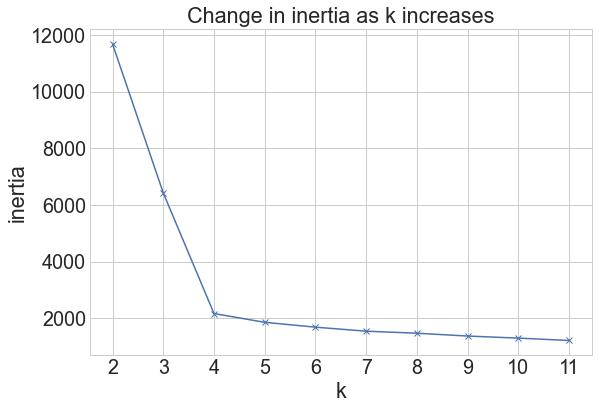

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

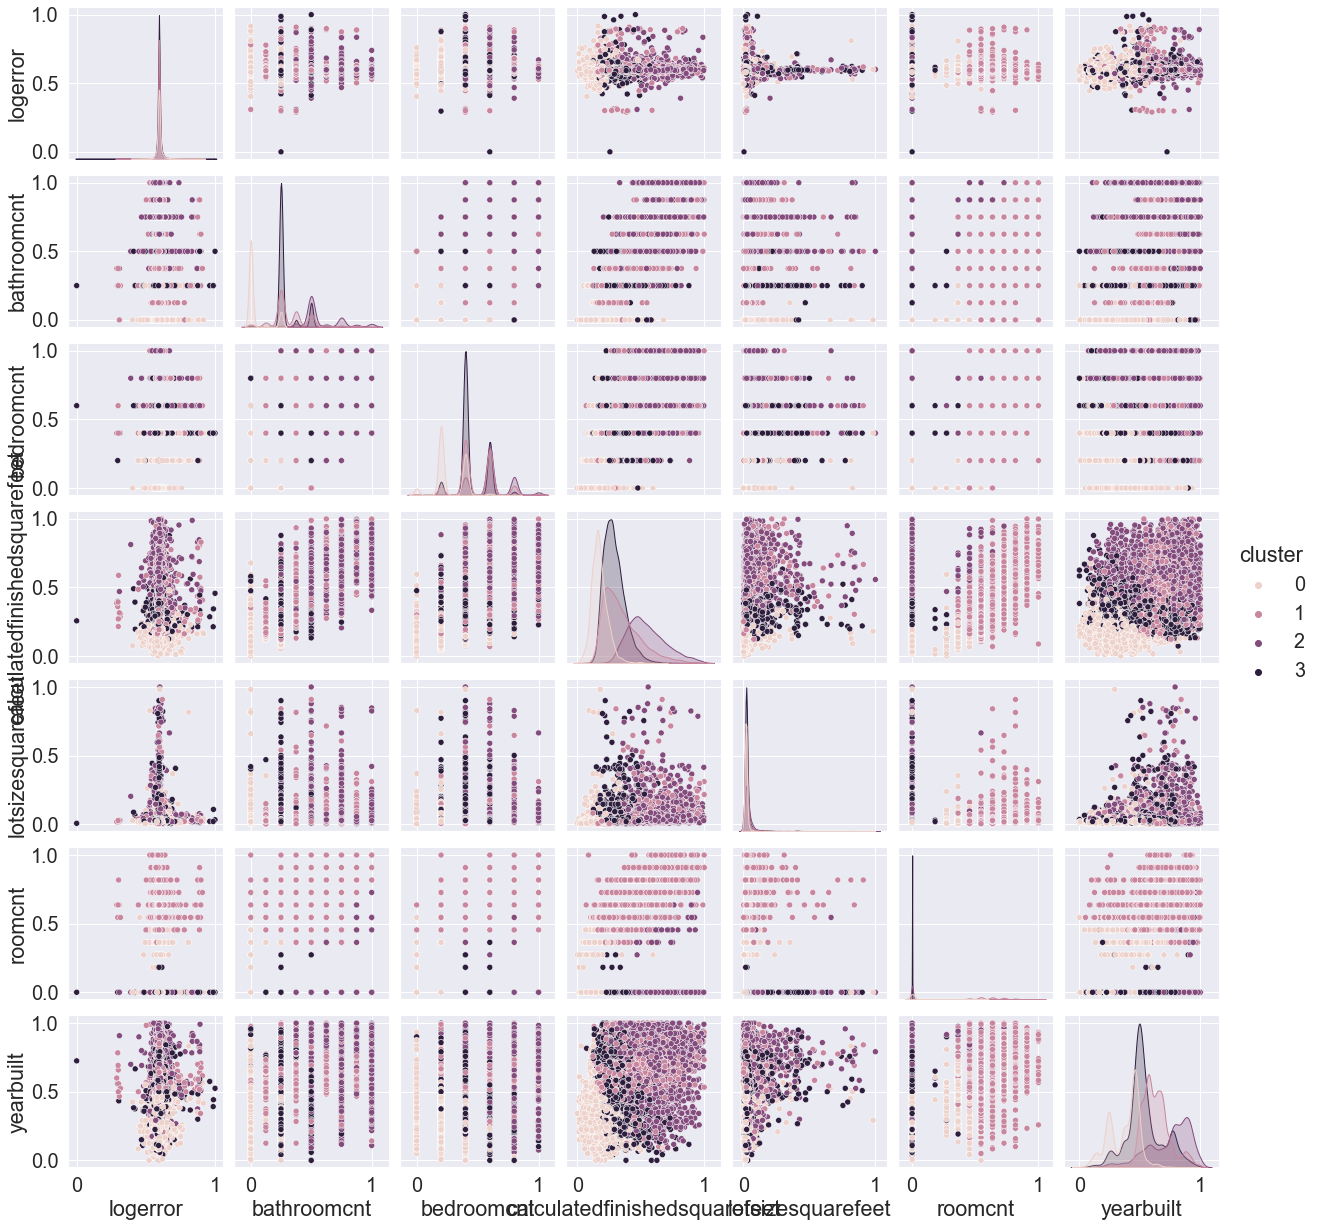

In [285]:
sns.pairplot(train_encoded_scaled, hue='cluster')
plt.show()

Text(0.5, 0.98, 'YRBUILT v. Logerror for (1) Population, (2) Clustered Population')

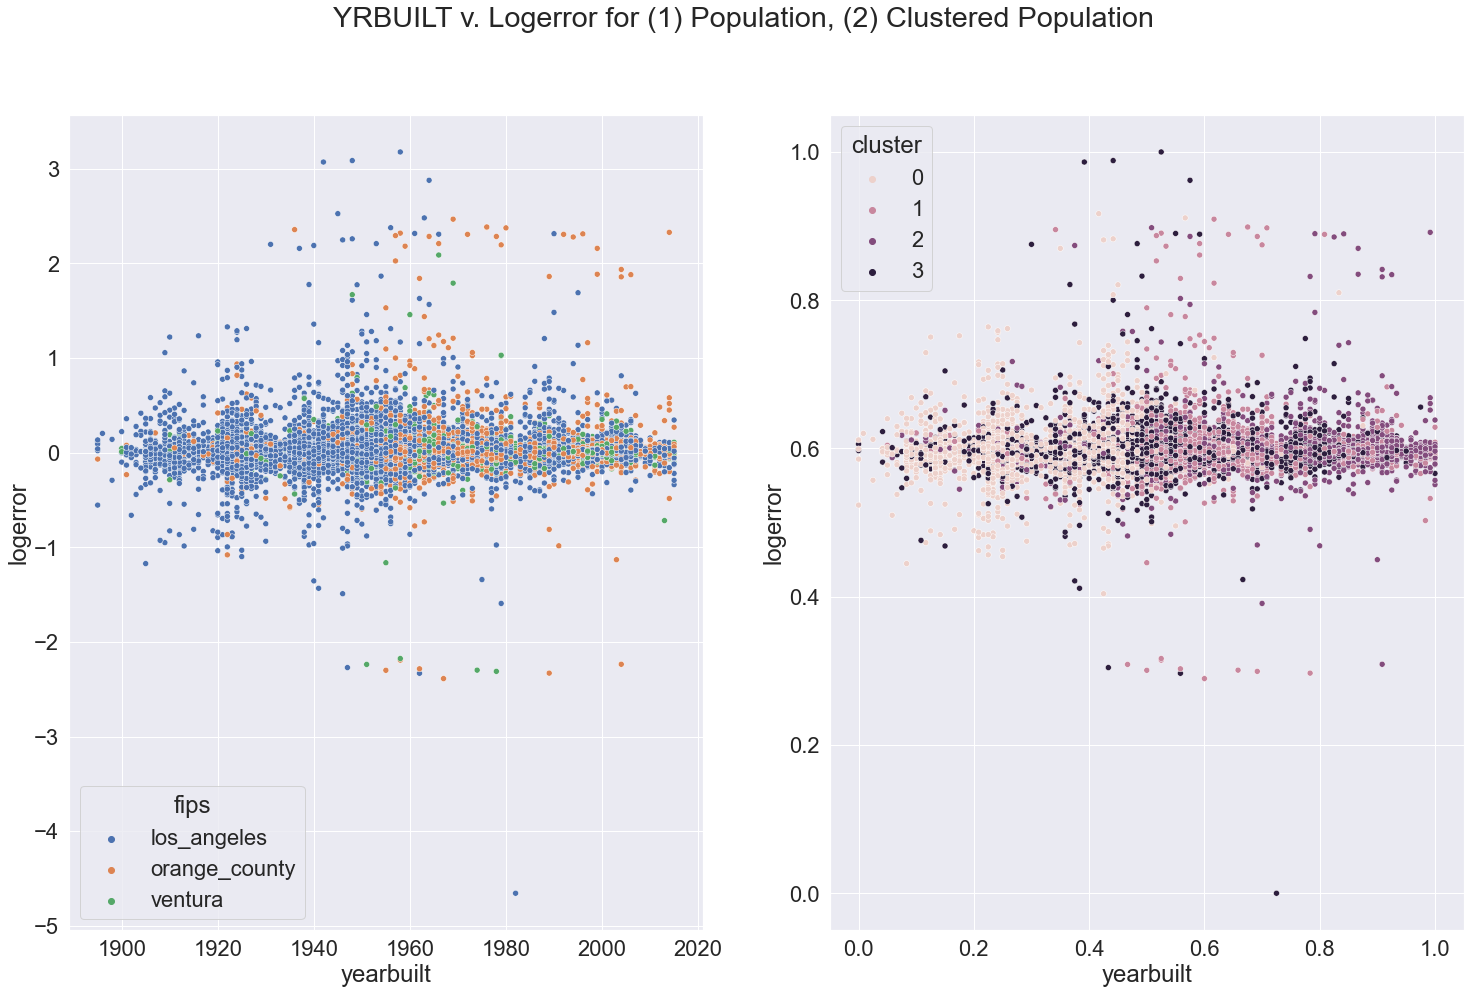

In [277]:
sns.set(font_scale = 2, rc={"figure.figsize":(25,15)})
fig, axes = plt.subplots(1, 2, sharey=False)

sns.scatterplot(y='logerror', x='yearbuilt', data=train, ax=axes[0], hue='fips')
sns.scatterplot(y='logerror', x='yearbuilt', data=train_encoded_scaled, ax=axes[1], hue='cluster')


fig.suptitle("""YRBUILT v. Logerror for (1) Population, (2) Clustered Population""")

## Clear differentiation with clusters pre- and post- 1963. It also looks like the clusters are grouping by county (fips)

Text(0.5, 0.98, 'SQFT v. Logerror for (1) Population, (2) <2500 SQFT, (3) >2500 SQFT, and Clusters (whole, 1st Half, 2nd Half')

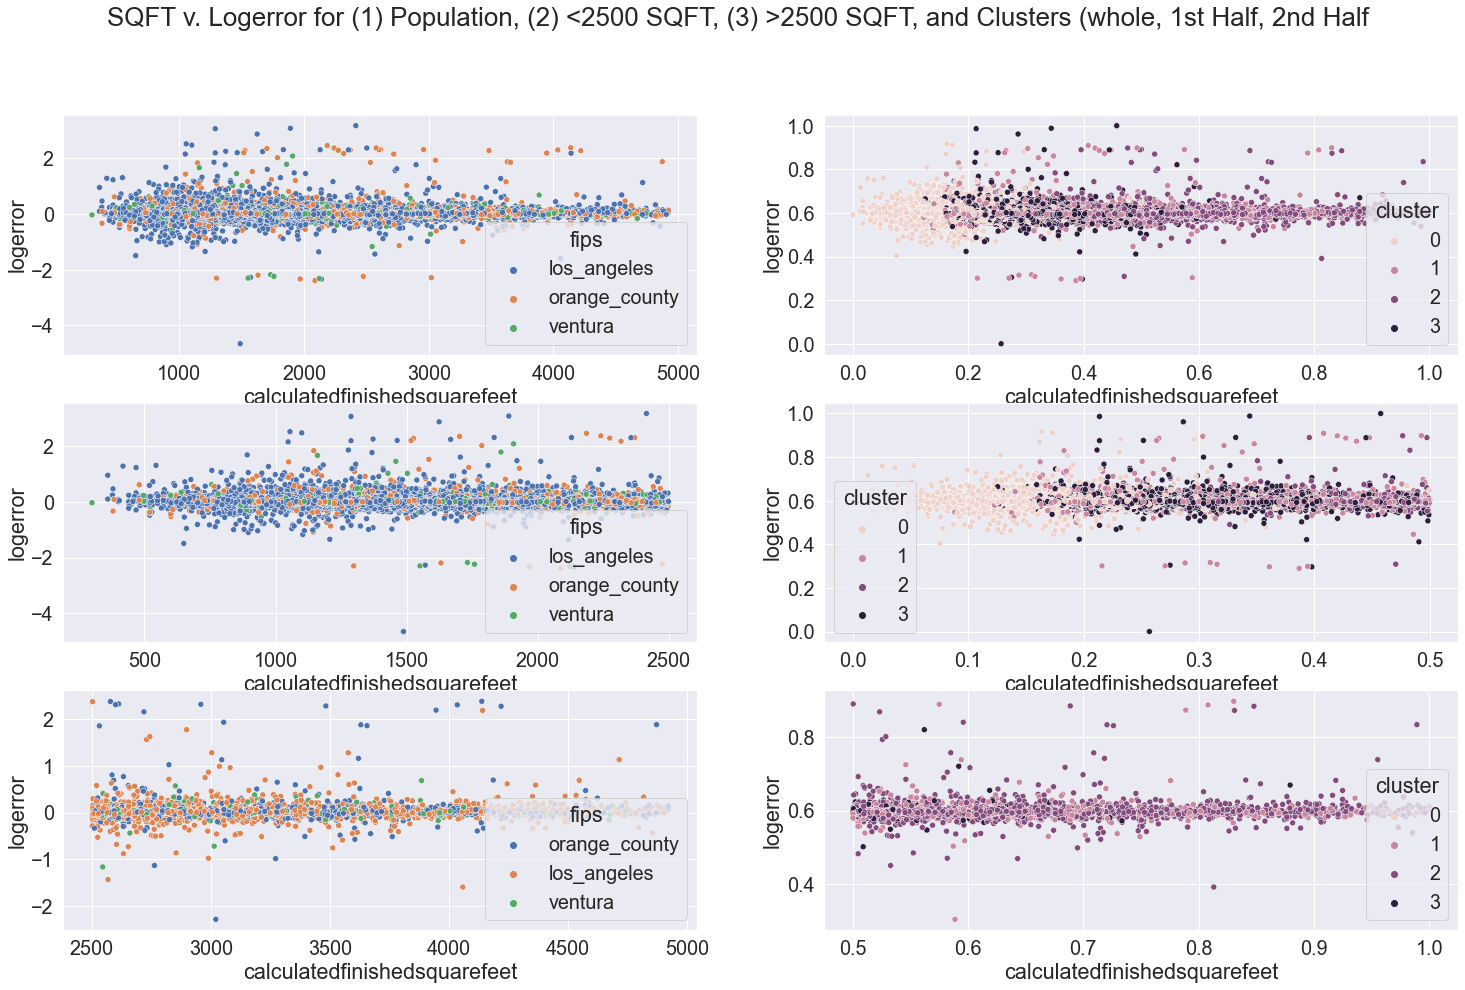

In [282]:
sns.set(font_scale = 1.8, rc={"figure.figsize":(25,15)})
fig, axes = plt.subplots(3, 2, sharey=False)

sns.scatterplot(y='logerror', x='calculatedfinishedsquarefeet', data=train, ax=axes[0,0], hue='fips')
sns.scatterplot(y='logerror', x='calculatedfinishedsquarefeet', data=train[train.calculatedfinishedsquarefeet < 2500], ax=axes[1,0], hue='fips')
sns.scatterplot(y='logerror', x='calculatedfinishedsquarefeet', data=train[train.calculatedfinishedsquarefeet > 2500], ax=axes[2,0], hue='fips')
sns.scatterplot(y='logerror', x='calculatedfinishedsquarefeet', data=train_encoded_scaled, ax=axes[0,1], hue='cluster')
sns.scatterplot(y='logerror', x='calculatedfinishedsquarefeet', data=train_encoded_scaled[train_encoded_scaled.calculatedfinishedsquarefeet < 0.5], ax=axes[1,1], hue='cluster')
sns.scatterplot(y='logerror', x='calculatedfinishedsquarefeet', data=train_encoded_scaled[train_encoded_scaled.calculatedfinishedsquarefeet > 0.5], ax=axes[2,1], hue='cluster')
fig.suptitle("""SQFT v. Logerror for (1) Population, (2) <2500 SQFT, (3) >2500 SQFT, and Clusters (whole, 1st Half, 2nd Half""")

## Validates the interpretation that there is a difference between houses along the lines of square feet. right around the midpoint value (although differences start to show up around 0.4 on scaled data)

## 4. Modeling with Clusters:
- The visualizations validate that the features FIPS, SQFT and YRBUILT are significant in terms of relating to the target variable logerror, so I'm gong to cluster on those three columns
- for this data set I'm going to use k=4 
- once clusters are made I'm going to run a linear regressionon the dataframe with the clusters as features

In [312]:
df = wrangle.wrangle_zillow()
df.head()

['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt']
       bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0         1.173897    0.736871                      1.172918   
1         1.270673    1.370886                      0.456237   
2         0.292845    0.317008                      0.677444   
3         0.684983    0.736871                      0.451506   
4         0.684983    0.736871                      1.035411   
...            ...         ...                           ...   
52437     0.292845    1.370886                      0.634597   
52438     0.292845    0.736871                      0.309763   
52439     1.270673    0.317008                      0.887689   
52440     0.292845    0.317008                      0.160299   
52441     0.292845    0.317008                      0.869754   

       lotsizesquarefeet   roomcnt  yearbuilt  taxvaluedollarcnt  
0               0.079053  0.601872  

logerror transactiondate  bathroomcnt  bedroomcnt  \
0  0.025595      2017-01-01          3.5         4.0   
1  0.055619      2017-01-01          1.0         2.0   
2  0.005383      2017-01-01          2.0         3.0   
3 -0.103410      2017-01-01          3.0         4.0   
4 -0.001011      2017-01-01          3.0         4.0   

   calculatedfinishedsquarefeet           fips    latitude    longitude  \
0                        3100.0  orange_county  33634931.0 -117869207.0   
1                        1465.0        ventura  34449266.0 -119281531.0   
2                        1243.0  orange_county  33886168.0 -117823170.0   
3                        2376.0    los_angeles  34245180.0 -118240722.0   
4                        2962.0    los_angeles  34145202.0 -118179824.0   

   lotsizesquarefeet  roomcnt  yearbuilt  taxvaluedollarcnt  
0             4506.0      0.0     1998.0          1023282.0  
1            12647.0      5.0     1967.0           464000.0  
2             8432.0      6.0     1962.0           564778.0  
3            13038.0      0.0     1970.0           145143.0  
4            63000.0      0.0     1950.0           773303.0

In [313]:
train, validate, test = split.train_validate_test_split(df, df.logerror)

In [324]:
train.columns
train = train.drop(columns=['latitude', 'longitude', 'taxvaluedollarcnt', 'transactiondate'])
train.head()

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
3323  -0.021395          2.0         3.0                        1115.0   
2470  -0.023569          1.0         2.0                        1754.0   
7019  -0.083987          3.0         4.0                        2497.0   
50112 -0.039345          3.0         3.0                        1780.0   
48192 -0.048605          2.0         5.0                        1875.0   

              fips  lotsizesquarefeet  roomcnt  yearbuilt  
3323   los_angeles            13043.0      0.0     1956.0  
2470   los_angeles             8666.0      0.0     1938.0  
7019   los_angeles            18496.0      0.0     1989.0  
50112  los_angeles             5069.0      0.0     2005.0  
48192  los_angeles             5940.0      0.0     1951.0

In [322]:
validate.columns
validate = validate.drop(columns=['latitude', 'longitude', 'taxvaluedollarcnt', 'transactiondate'])


KeyError: "['latitude' 'longitude' 'taxvaluedollarcnt' 'transactiondate'] not found in axis"

In [323]:
validate.head()

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
8075  -0.015509          2.0         4.0                        1540.0   
15717 -0.005530          2.5         3.0                        2358.0   
942    0.042514          1.5         3.0                        1220.0   
5169   0.072496          2.5         4.0                        1913.0   
39296  0.098910          2.0         2.0                        1082.0   

                fips  lotsizesquarefeet  roomcnt  yearbuilt  
8075   orange_county             6076.0      7.0     1961.0  
15717  orange_county             5747.0      0.0     1999.0  
942    orange_county             9009.0      6.0     1954.0  
5169         ventura             8807.0      7.0     1982.0  
39296    los_angeles             2370.0      0.0     1946.0

In [320]:
test.columns
test = test.drop(columns=['latitude', 'longitude', 'taxvaluedollarcnt', 'transactiondate'])
test.head()

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
44954  0.028347          2.0         3.0                        1205.0   
50195  0.049412          2.0         3.0                        1702.0   
12037 -0.035684          2.0         4.0                        1687.0   
20966 -0.086395          4.0         4.0                        2324.0   
37068 -0.024851          2.0         3.0                        1328.0   

                fips  lotsizesquarefeet  roomcnt  yearbuilt  
44954        ventura        7677.000000      5.0     1964.0  
50195  orange_county        5265.000000      7.0     1973.0  
12037    los_angeles        5101.000000      0.0     1995.0  
20966    los_angeles       11339.520135      0.0     1927.0  
37068    los_angeles        6499.000000      0.0     1954.0

In [318]:
train.columns, validate.columns, test.columns

(Index(['logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt',
        'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
        'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt'],
       dtype='object'),
 Index(['logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt',
        'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
        'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt'],
       dtype='object'),
 Index(['logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt',
        'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
        'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt'],
       dtype='object'))

In [325]:
encoded_train = wrangle.encode_zillow(train)
encoded_validate = wrangle.encode_zillow(validate)
encoded_test = wrangle.encode_zillow(test)

In [343]:
scaler = sklearn.preprocessing.MinMaxScaler()

encoded_train_scaled, encoded_validate_scaled, encoded_test_scaled = wrangle.fit_and_scale(scaler,encoded_train,encoded_validate, encoded_test)
encoded_train_scaled.head()

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0  0.591746         0.25         0.4                      0.176331   
1  0.591468         0.00         0.2                      0.314582   
2  0.583753         0.50         0.6                      0.475335   
3  0.589454         0.50         0.4                      0.320208   
4  0.588271         0.25         0.8                      0.340762   

   lotsizesquarefeet  roomcnt  yearbuilt  
0           0.046697      0.0   0.508333  
1           0.030350      0.0   0.358333  
2           0.067063      0.0   0.783333  
3           0.016915      0.0   0.916667  
4           0.020168      0.0   0.466667

In [347]:
from sklearn.cluster import KMeans

X = encoded_train_scaled
X2 = encoded_validate_scaled
X3 = encoded_test_scaled
kmeans = KMeans(n_clusters = 4)

kmeans.fit(X)
kmeans.fit(X2)
kmeans.fit(X3)
kmeans.predict(X)
kmeans.predict(X2)
kmeans.predict(X3)
kmeans.cluster_centers_


array([[5.98448311e-01, 5.85265327e-01, 6.14837713e-01, 5.49038033e-01,
        4.26065708e-02, 2.66966418e-03, 7.44100979e-01],
       [5.97322864e-01, 3.37022323e-01, 5.04502459e-01, 3.55465543e-01,
        2.83968988e-02, 6.31788945e-01, 6.27388622e-01],
       [5.95972240e-01, 2.88142558e-01, 4.41243276e-01, 2.89307835e-01,
        3.22343882e-02, 8.15084497e-05, 5.42994122e-01],
       [5.95536860e-01, 3.82086168e-02, 2.64036281e-01, 1.73122211e-01,
        2.38765986e-02, 3.52504638e-02, 3.71969696e-01]])

In [348]:

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0  0.598448     0.585265    0.614838                      0.549038   
1  0.597323     0.337022    0.504502                      0.355466   
2  0.595972     0.288143    0.441243                      0.289308   
3  0.595537     0.038209    0.264036                      0.173122   

   lotsizesquarefeet   roomcnt  yearbuilt  
0           0.042607  0.002670   0.744101  
1           0.028397  0.631789   0.627389  
2           0.032234  0.000082   0.542994  
3           0.023877  0.035250   0.371970

In [349]:
encoded_train_scaled['cluster'] = kmeans.predict(X)
encoded_validate_scaled['cluster'] = kmeans.predict(X2)
encoded_test_scaled['cluster'] = kmeans.predict(X3)
encoded_train_scaled.head()

logerror  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0  0.591746         0.25         0.4                      0.176331   
1  0.591468         0.00         0.2                      0.314582   
2  0.583753         0.50         0.6                      0.475335   
3  0.589454         0.50         0.4                      0.320208   
4  0.588271         0.25         0.8                      0.340762   

   lotsizesquarefeet  roomcnt  yearbuilt  cluster  
0           0.046697      0.0   0.508333        2  
1           0.030350      0.0   0.358333        3  
2           0.067063      0.0   0.783333        0  
3           0.016915      0.0   0.916667        0  
4           0.020168      0.0   0.466667        2

In [350]:
X_train = encoded_train.drop(columns='logerror')
y_train = encoded_train.drop(columns=X_train)

X_validate = encoded_validate.drop(columns='logerror')
y_validate = encoded_validate.drop(columns=X_validate)

X_test = encoded_test.drop(columns='logerror')
y_test = encoded_test.drop(columns=X_test)

## Now that the data has been scaled, encoded and clusters have been added as a feature we are ready for modeling with clusters.

In [335]:
X_train.head(1)

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
3323          2.0         3.0                        1115.0   

      lotsizesquarefeet  roomcnt  yearbuilt  fips_los_angeles  \
3323            13043.0      0.0     1956.0                 1   

      fips_orange_county  fips_ventura  
3323                   0             0

In [ ]:
#scale the x sets

In [336]:
X_scaled_train, X_scaled_validate, X_scaled_test = wrangle.fit_and_scale(scaler, X_train, X_validate, X_test)
X_scaled_train.head(1)


bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  lotsizesquarefeet  \
0         0.25         0.4                      0.176331           0.046697   

   roomcnt  yearbuilt  
0      0.0   0.508333

<h3> Calculate Baseline Error </h3>

In [339]:
# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# the baseline prediction is equal to the mean home price for all homes

In [340]:
# add baseline for y_train
y_train['logerror'] = y_train.logerror.mean()
y_validate['logerror'] = y_validate.logerror.mean()
#compute residual error for the baseline prediction:
y_train['baseline_residual'] = y_train.logerror - y_train.logerror


In [342]:
# compute baseline RMSE
baseline_RMSE = mean_squared_error(y_train.logerror, y_train.baseline_residual)**(1/2)
print("The baseline RMSE is:", baseline_RMSE)

The baseline RMSE is: 0.017241315105821574


## Modeling Logerror with Cluster Feature: Polynomial Regression

### I selected the best performing model from the Regression Project I previously commpleted.

In [351]:
# based on the scatter plot distributions, I believe that degree=2 is appropriate
# for the polynomial regression model
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_scaled_train_degree2 = pf.fit_transform(X_scaled_train)

# transform X_validate_scaled & X_test_scaled
X_scaled_validate_degree2 = pf.transform(X_scaled_validate)
X_scaled_test_degree2 = pf.transform(X_scaled_test)

In [352]:
# Linear Regression (OLS)
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_scaled_train_degree2, y_train.logerror)

# predict price on train dataset
y_train['train_poly_pred_logerror'] = lm2.predict(X_scaled_train_degree2)

# evaluate: rmse
poly_rmse_train = mean_squared_error(y_train.logerror, y_train.train_poly_pred_logerror)**(1/2)

# predict validate
y_validate['validate_poly_pred_logerror'] = lm2.predict(X_scaled_validate_degree2)

# evaluate: rmse
poly_rmse_validate = mean_squared_error(y_validate.logerror, y_validate.validate_poly_pred_logerror)**(1/2)

print("RMSE for Polynomial Regression using LinearRegression\nTraining/In-Sample: ", poly_rmse_train, 
      "\nValidation/Out-of-Sample: ", poly_rmse_validate)

RMSE for Polynomial Regression using LinearRegression
Training/In-Sample:  0.1663629744517473 
Validation/Out-of-Sample:  0.17306159088471165


In [354]:
# Linear Regression (OLS)
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_scaled_train_degree2, y_train.logerror)

# predict test
test_poly_pred_logerror = lm2.predict(X_scaled_test_degree2)

# evaluate: rmse
poly_rmse_test = mean_squared_error(y_test.logerror, test_poly_pred_logerror)**(1/2)

print("RMSE for Polynomial Regression using LinearRegression\nTraining/In-Sample: ", poly_rmse_train,
      "\nValidate/Out-of-Sample: ", poly_rmse_validate,
      "\nTest/Out-of-Sample: ", poly_rmse_test)

RMSE for Polynomial Regression using LinearRegression
Training/In-Sample:  0.1663629744517473 
Validate/Out-of-Sample:  0.17306159088471165 
Test/Out-of-Sample:  0.1838045909828521


## 5. Conclusions and Findings From Clustering :
- clustering did not significantly improve the modeling process when incorporated as a feature
    - my cluster features were SQ FT, YR BUILT, and FIPS
- clustering was helpful in identifying and narrowing variable connection to the target variable, LOGERROR
- I found SQ FT, YR BUILT and FIPS to be the main drivers of LOGERROR
- LOGERROR RMSE baseline: 0.172
- LOGERROR RMSE on with clusters in the model: 0.183

## 6. Recommendations and Next Steps :
- I think that clustering will be more useful with a categorical target variable, but cannot recommend using the model with current performance and clusters as a feature
- perhaps a more targeted cluster (focused on home size) or several groups of targeted clusters can be meaningfully incorporated into a predictive model in the future.